In [1]:
from azure.storage.blob import BlockBlobService
import pandas as pd
from pandas import DataFrame
import numpy as np
import json
import os
import requests
from datetime import datetime
from itertools import islice

from datetime import datetime, timedelta

import os

from matplotlib import pyplot as plt
%matplotlib inline

C:\Users\leuci\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
def nearest_datetime(serie, search_for):
    '''
    Cerca l'elemento in "serie" più vicino a "search_for"
    '''
    dt = min(serie, key=lambda x: abs(x - search_for))
    return dt

def formatter(s):
    '''
    Trasforma la data ""%Y-%m-%d %H:%M:%S*" in "%Y-%m-%d %H:%M:%S.%f"
    '''
    try:
        n = len(s.split('.')[1])
    except:
        s = s+'.'
        n = 0
    for i in range(4-n):
        s = s+'0'
    return s

def finder_pos(dataframe, when):
    try:
        stamp = dataframe.loc[when]['datetime_copy']
    except:
        stamp = ''
    try:
        lat = dataframe.loc[when]['latitude']
    except:
        lat = ''
    try:
        lon = dataframe.loc[when]['longitude']
    except:
        lon = ''
    try:
        vel = dataframe.loc[when]['speed']
    except:
        vel = ''
   # try:
   #     road = dataframe.loc[when]['road']
   # except:
   #     road = ''
   # try:
   #     limit = dataframe.loc[when]['speed_limit']
   # except:
   #     limit = ''
    return stamp,lat,lon,vel#,road,limit

def finder_acc(dataframe, when):
    try:
        x = dataframe.loc[when]['accX']
    except:
        x = ''
    try:
        y = dataframe.loc[when]['accY']
    except:
        y = ''
    try:
        z = dataframe.loc[when]['accZ']
    except:
        z = ''
    return x,y,z

In [3]:
# SET PROXY TO REACH BLOB
proxy_cred = pd.read_csv('proxy.cred.txt',
                         sep=';',
                         encoding='UTF8',
                         header=None,
                         index_col=0)

proxy = proxy_cred.loc['proxy'][1]
os.environ['http_proxy'] = proxy
os.environ['https_proxy'] = proxy
requests.get("http://google.com")

<Response [200]>

In [4]:
#Azure blob configuration
credentials = pd.read_csv('blobazure_iot_prima_di_agosto.cred',
                          sep=';',
                          encoding='UTF8',
                          header=None,
                          index_col=0)
account = credentials.loc['account'][1]
key = credentials.loc['key'][1]

account = account
key = key
generali_blob = BlockBlobService(account_name=account,
                                 sas_token=key)

In [6]:
'''
GENERA IL NEXT MARKER DELLA PAGINA CHE SI VUOLE VISITARE (page_to_visit)
'''
page_to_visit = 41  # il 13/11 riparti dalla 41
num_pages = 0
next_marker = None

path = 'crash/2/770/GENERALI_PILOT_TSP/'
container = 'fileupload'

for i in range(page_to_visit):
    num_pages +=1
    print(num_pages)
    generator = generali_blob.list_blobs(container,
                                         path,
                                         marker=next_marker)
    next_marker = generator.next_marker
    print(num_pages, '   ', next_marker)
   # if len(next_marker)<10:
   #     break

1
1     2!136!MDAwMDU2IWNyYXNoLzIvNzcwL0dFTkVSQUxJX1BJTE9UX1RTUC8yNDk0MzYvMjAxOC83LzI5LzQ5NDg5NjYyITAwMDAyOCE5OTk5LTEyLTMxVDIzOjU5OjU5Ljk5OTk5OTlaIQ--
2
2     2!136!MDAwMDU2IWNyYXNoLzIvNzcwL0dFTkVSQUxJX1BJTE9UX1RTUC8yNTIxNDUvMjAxOC85LzIyLzU0NDgxOTczITAwMDAyOCE5OTk5LTEyLTMxVDIzOjU5OjU5Ljk5OTk5OTlaIQ--
3
3     2!136!MDAwMDU2IWNyYXNoLzIvNzcwL0dFTkVSQUxJX1BJTE9UX1RTUC8yNTIxNTEvMjAxOC80LzIzLzQwNjA2NjYxITAwMDAyOCE5OTk5LTEyLTMxVDIzOjU5OjU5Ljk5OTk5OTlaIQ--
4
4     2!132!MDAwMDU1IWNyYXNoLzIvNzcwL0dFTkVSQUxJX1BJTE9UX1RTUC8yNTQ0ODYvMjAxOC83LzkvNDc2MDAxMTYhMDAwMDI4ITk5OTktMTItMzFUMjM6NTk6NTkuOTk5OTk5OVoh
5
5     2!136!MDAwMDU2IWNyYXNoLzIvNzcwL0dFTkVSQUxJX1BJTE9UX1RTUC8yNTY2ODkvMjAxOC80LzE0LzM5NzY2MzY2ITAwMDAyOCE5OTk5LTEyLTMxVDIzOjU5OjU5Ljk5OTk5OTlaIQ--
6
6     2!136!MDAwMDU3IWNyYXNoLzIvNzcwL0dFTkVSQUxJX1BJTE9UX1RTUC8yNTc0MTIvMjAxOC8xMC8yMy81NzMwMzE3MiEwMDAwMjghOTk5OS0xMi0zMVQyMzo1OTo1OS45OTk5OTk5WiE-
7
7     2!136!MDAwMDU2IWNyYXNoLzIvNzcwL0dFTkVSQUxJX1BJTE9UX1RTUC8yNjQ2MDYvMjAxOC81LzE1LzQyNTI1OTU0

In [7]:
next_marker = None

#### PAGINAZIONE

In [ ]:
path = 'crash/2/770/GENERALI_PILOT_TSP/'
container = 'fileupload'

lenpos = []
lenacc = []

crash = pd.DataFrame()
counter = 0
blob2parse = 50000000


while True:
    generator = generali_blob.list_blobs(container,
                                         path,
                                         marker=next_marker)

    
    lt = []
    anomalies = []
    df_pos = pd.DataFrame()
    totali = len(generator.items)
    print(totali)

    for blob in generator.items:
        try:
            counter = counter + 1
            if counter > blob2parse:
                break

            if counter%10==0:
                print('Parsati almeno %i blob' %(counter))

            name = blob.name
            
            generali_blob.get_blob_to_path(container,
                                           name,
                                           name.split('/')[1])

            data=json.load(open(name.split('/')[1]))
        
            crashId = data['crashId']
            deviceId = data['deviceId']       
            crash_time = data['deviceDate']
            crash_time = crash_time.split('T')[0]+' '+crash_time.split('T')[1]
            strdate = crash_time.replace('-','_')
            strdate = strdate.replace(':','_')

            crash_time = datetime.strptime(formatter(crash_time), '%Y-%m-%d %H:%M:%S.%f')

            acc = []
            pos = []

            # POSITION
            for sample in data['crash_position']:
                date_time = ' '.join(sample['deviceDate'].split('T'))
                date_time = formatter(date_time)  # formatta la data per to_datetime
                lat = sample['latitude']
                lon = sample['longitude']
                speed = sample['speed']
                pos.append([date_time,
                            lat,
                            lon,
                            speed])
            pos = DataFrame(pos, columns = ['datetime',
                                            'latitude',
                                            'longitude',
                                            'speed'])

            pos['datetime'] = pd.to_datetime(pos['datetime'],
                                             format='%Y-%m-%d %H:%M:%S.%f')

            pos['datetime_copy'] = pos['datetime']
            pos = pos.set_index('datetime')

            frames = []

            for i in range(-20,21):
                t = crash_time + timedelta(seconds=i)          
                stamp, latit, longit, veloc = finder_pos(pos,t)

                frames.append([
                    stamp,
                    i,
                    latit,
                    longit,
                    veloc,
                    crashId,
                    deviceId,
                    crash_time
                ])

            frame = DataFrame(frames, columns = [
                                            'datetime',
                                            'seconds_to_crash',
                                            'latitude',
                                            'longitude',
                                            'speed',
                                            'crashId',
                                            'deviceId',
                                            'crash_time'])
            df_pos = pd.concat([df_pos,frame])  # per calcolo mancanti

            # ACCELERAZIONI
            for sample in data['crash_acceleration']:
                date_time = ' '.join(sample['deviceDate'].split('T'))
                date_time = formatter(date_time)  # formatta la data per to_datetime
                x = sample['accX']
                y = sample['accY']
                z = sample['accZ']
                acc.append([date_time,
                            x,
                            y,
                            z,
                            crashId,
                            deviceId,
                            crash_time])



            acc = DataFrame(acc, columns = ['datetime',
                                            'accX',
                                            'accY',
                                            'accZ',
                                            'crashId',
                                            'deviceId',
                                            'crash_time'])  
            acc['datetime'] = pd.to_datetime(acc['datetime'],
                                             format='%Y-%m-%d %H:%M:%S.%f')

            file_name = '_'.join([strdate,name.split('/')[8], deviceId])
            frame.to_csv('D:\Master\Blob2csv\POS\\'+file_name+'_POS_beforeAugust.csv',index=False,sep=';')
            acc.to_csv('D:\Master\Blob2csv\ACC\\'+file_name+'_ACC_beforeAugust.csv',index=False,sep=';')

        except Exception as e:
            counter += 1
            print('error {} on {}'.format(e, name))
            pass

    next_marker = generator.next_marker  # selettore pagina successiva
    #pages_visited.writerow([next_marker])
    print('Switch to page', next_marker)
    
    if counter > blob2parse or next_marker==None:
        break
        
        
print('Finito. Parsati {} blob.'.format(counter-1))
filepage.close()
print('Finito. Parsati {} blob.'.format(counter-1))
filepage.close()

print('Pos mancanti:',len(df_pos[df_pos['latitude']==''])/len(df_pos))

5000
Parsati almeno 10 blob
Parsati almeno 20 blob
Parsati almeno 30 blob
Parsati almeno 40 blob
Parsati almeno 50 blob
Parsati almeno 60 blob
Parsati almeno 70 blob
Parsati almeno 80 blob
Parsati almeno 90 blob
Parsati almeno 100 blob
Parsati almeno 110 blob
Parsati almeno 120 blob
Parsati almeno 130 blob
Parsati almeno 140 blob
Parsati almeno 150 blob
Parsati almeno 160 blob
Parsati almeno 170 blob
Parsati almeno 180 blob
Parsati almeno 190 blob
Parsati almeno 200 blob
Parsati almeno 210 blob
Parsati almeno 220 blob
Parsati almeno 230 blob
Parsati almeno 240 blob
Parsati almeno 250 blob
Parsati almeno 260 blob
Parsati almeno 270 blob
Parsati almeno 280 blob
Parsati almeno 290 blob
Parsati almeno 300 blob
error Extra data: line 1 column 128063 (char 128062) on crash/2/770/GENERALI_PILOT_TSP/248199/2018/7/10/47700193
error Extra data: line 1 column 130092 (char 130091) on crash/2/770/GENERALI_PILOT_TSP/248199/2018/7/10/47700237
Parsati almeno 310 blob
Parsati almeno 320 blob
Parsati al

Parsati almeno 1970 blob
Parsati almeno 1980 blob
Parsati almeno 1990 blob
Parsati almeno 2000 blob
Parsati almeno 2010 blob
Parsati almeno 2020 blob
Parsati almeno 2030 blob
Parsati almeno 2040 blob
Parsati almeno 2050 blob
Parsati almeno 2060 blob
Parsati almeno 2070 blob
Parsati almeno 2080 blob
Parsati almeno 2090 blob
Parsati almeno 2100 blob
Parsati almeno 2110 blob
Parsati almeno 2120 blob
Parsati almeno 2130 blob
Parsati almeno 2140 blob
Parsati almeno 2150 blob
Parsati almeno 2160 blob
Parsati almeno 2170 blob
Parsati almeno 2180 blob
Parsati almeno 2190 blob
Parsati almeno 2200 blob
Parsati almeno 2210 blob
Parsati almeno 2220 blob
Parsati almeno 2230 blob
Parsati almeno 2240 blob
Parsati almeno 2250 blob
Parsati almeno 2260 blob
Parsati almeno 2270 blob
Parsati almeno 2280 blob
Parsati almeno 2290 blob
Parsati almeno 2300 blob
Parsati almeno 2310 blob
Parsati almeno 2320 blob
Parsati almeno 2330 blob
Parsati almeno 2340 blob
Parsati almeno 2350 blob
Parsati almeno 2360 blob


Parsati almeno 4990 blob
Parsati almeno 5000 blob
Parsati almeno 5010 blob
Parsati almeno 5020 blob
Parsati almeno 5030 blob
Parsati almeno 5040 blob
Parsati almeno 5050 blob
Parsati almeno 5060 blob
Parsati almeno 5070 blob
Switch to page 2!136!MDAwMDU2IWNyYXNoLzIvNzcwL0dFTkVSQUxJX1BJTE9UX1RTUC8yNDk0MzYvMjAxOC83LzI5LzQ5NDg5NjYyITAwMDAyOCE5OTk5LTEyLTMxVDIzOjU5OjU5Ljk5OTk5OTlaIQ--
5000
Parsati almeno 5080 blob
Parsati almeno 5090 blob
Parsati almeno 5100 blob
Parsati almeno 5110 blob
Parsati almeno 5120 blob
Parsati almeno 5130 blob
Parsati almeno 5140 blob
Parsati almeno 5150 blob
Parsati almeno 5160 blob
Parsati almeno 5170 blob
Parsati almeno 5180 blob
Parsati almeno 5190 blob
Parsati almeno 5200 blob
Parsati almeno 5210 blob
Parsati almeno 5220 blob
Parsati almeno 5230 blob
Parsati almeno 5240 blob
Parsati almeno 5250 blob
Parsati almeno 5260 blob
Parsati almeno 5270 blob
Parsati almeno 5280 blob
Parsati almeno 5290 blob
Parsati almeno 5300 blob
Parsati almeno 5310 blob
Parsati alme

Parsati almeno 7820 blob
Parsati almeno 7830 blob
Parsati almeno 7840 blob
Parsati almeno 7850 blob
Parsati almeno 7860 blob
Parsati almeno 7870 blob
Parsati almeno 7880 blob
Parsati almeno 7890 blob
Parsati almeno 7900 blob
error Extra data: line 1 column 130090 (char 130089) on crash/2/770/GENERALI_PILOT_TSP/249446/2018/8/11/50754147
error Extra data: line 1 column 129977 (char 129976) on crash/2/770/GENERALI_PILOT_TSP/249446/2018/8/11/50754688
Parsati almeno 7910 blob
Parsati almeno 7920 blob
Parsati almeno 7930 blob
Parsati almeno 7940 blob
Parsati almeno 7950 blob
Parsati almeno 7960 blob
Parsati almeno 7970 blob
Parsati almeno 7980 blob
Parsati almeno 7990 blob
Parsati almeno 8000 blob
Parsati almeno 8010 blob
Parsati almeno 8020 blob
Parsati almeno 8030 blob
Parsati almeno 8040 blob
Parsati almeno 8050 blob
Parsati almeno 8060 blob
Parsati almeno 8070 blob
Parsati almeno 8080 blob
Parsati almeno 8090 blob
Parsati almeno 8100 blob
Parsati almeno 8110 blob
Parsati almeno 8120 blob

Parsati almeno 10500 blob
Parsati almeno 10510 blob
Parsati almeno 10520 blob
Parsati almeno 10530 blob
Parsati almeno 10540 blob
Parsati almeno 10550 blob
Parsati almeno 10560 blob
Parsati almeno 10570 blob
Parsati almeno 10580 blob
Parsati almeno 10590 blob
Parsati almeno 10600 blob
Parsati almeno 10610 blob
Parsati almeno 10620 blob
Parsati almeno 10630 blob
Parsati almeno 10640 blob
Parsati almeno 10650 blob
Parsati almeno 10660 blob
Parsati almeno 10670 blob
Parsati almeno 10680 blob
Parsati almeno 10690 blob
Parsati almeno 10700 blob
Parsati almeno 10710 blob
Parsati almeno 10720 blob
Parsati almeno 10730 blob
Parsati almeno 10740 blob
Parsati almeno 10750 blob
Parsati almeno 10760 blob
Parsati almeno 10770 blob
Parsati almeno 10780 blob
Parsati almeno 10790 blob
Parsati almeno 10800 blob
Parsati almeno 10810 blob
Parsati almeno 10820 blob
Parsati almeno 10830 blob
Parsati almeno 10840 blob
Parsati almeno 10850 blob
Parsati almeno 10860 blob
Parsati almeno 10870 blob
Parsati alme

Parsati almeno 13460 blob
Parsati almeno 13470 blob
Parsati almeno 13480 blob
Parsati almeno 13490 blob
Parsati almeno 13500 blob
Parsati almeno 13510 blob
Parsati almeno 13520 blob
Parsati almeno 13530 blob
Parsati almeno 13540 blob
Parsati almeno 13550 blob
Parsati almeno 13560 blob
Parsati almeno 13570 blob
Parsati almeno 13580 blob
Parsati almeno 13590 blob
Parsati almeno 13600 blob
Parsati almeno 13610 blob
Parsati almeno 13620 blob
Parsati almeno 13630 blob
Parsati almeno 13640 blob
Parsati almeno 13650 blob
Parsati almeno 13660 blob
Parsati almeno 13670 blob
Parsati almeno 13680 blob
Parsati almeno 13690 blob
Parsati almeno 13700 blob
Parsati almeno 13710 blob
Parsati almeno 13720 blob
Parsati almeno 13730 blob
Parsati almeno 13740 blob
Parsati almeno 13750 blob
Parsati almeno 13760 blob
Parsati almeno 13770 blob
Parsati almeno 13780 blob
Parsati almeno 13790 blob
Parsati almeno 13800 blob
Parsati almeno 13810 blob
Parsati almeno 13820 blob
Parsati almeno 13830 blob
Parsati alme

Parsati almeno 15480 blob
Parsati almeno 15490 blob
Parsati almeno 15500 blob
Parsati almeno 15510 blob
Parsati almeno 15520 blob
Parsati almeno 15530 blob
Parsati almeno 15540 blob
Parsati almeno 15550 blob
error Extra data: line 1 column 129596 (char 129595) on crash/2/770/GENERALI_PILOT_TSP/252152/2018/10/26/57555075
Parsati almeno 15560 blob
Parsati almeno 15570 blob
Parsati almeno 15580 blob
Parsati almeno 15590 blob
Parsati almeno 15600 blob
Parsati almeno 15610 blob
Parsati almeno 15620 blob
Parsati almeno 15630 blob
Parsati almeno 15640 blob
Parsati almeno 15650 blob
Parsati almeno 15660 blob
Parsati almeno 15670 blob
Parsati almeno 15680 blob
Parsati almeno 15690 blob
Parsati almeno 15700 blob
Parsati almeno 15710 blob
Parsati almeno 15720 blob
error Extra data: line 1 column 130834 (char 130833) on crash/2/770/GENERALI_PILOT_TSP/252153/2018/7/10/47689817
error Extra data: line 1 column 130777 (char 130776) on crash/2/770/GENERALI_PILOT_TSP/252153/2018/7/19/48561245
Parsati al

error Extra data: line 1 column 129138 (char 129137) on crash/2/770/GENERALI_PILOT_TSP/253780/2018/10/25/57517892
Parsati almeno 18120 blob
Parsati almeno 18130 blob
Parsati almeno 18140 blob
Parsati almeno 18150 blob
Parsati almeno 18160 blob
Parsati almeno 18170 blob
Parsati almeno 18180 blob
Parsati almeno 18190 blob
Parsati almeno 18200 blob
Parsati almeno 18210 blob
Parsati almeno 18220 blob
Parsati almeno 18230 blob
Parsati almeno 18240 blob
Parsati almeno 18250 blob
Parsati almeno 18260 blob
Parsati almeno 18270 blob
Parsati almeno 18280 blob
Parsati almeno 18290 blob
Parsati almeno 18300 blob
Parsati almeno 18310 blob
Parsati almeno 18320 blob
Parsati almeno 18330 blob
Parsati almeno 18340 blob
Parsati almeno 18350 blob
Parsati almeno 18360 blob
Parsati almeno 18370 blob
Parsati almeno 18380 blob
Parsati almeno 18390 blob
Parsati almeno 18400 blob
Parsati almeno 18410 blob
Parsati almeno 18420 blob
Parsati almeno 18430 blob
Parsati almeno 18440 blob
Parsati almeno 18450 blob
Pa

Parsati almeno 20840 blob
Parsati almeno 20850 blob
Parsati almeno 20860 blob
Parsati almeno 20870 blob
Parsati almeno 20880 blob
Parsati almeno 20890 blob
error Extra data: line 1 column 129032 (char 129031) on crash/2/770/GENERALI_PILOT_TSP/256685/2018/10/3/55465667
Parsati almeno 20900 blob
Parsati almeno 20910 blob
Parsati almeno 20920 blob
Parsati almeno 20930 blob
Parsati almeno 20940 blob
Parsati almeno 20950 blob
Parsati almeno 20960 blob
Parsati almeno 20970 blob
Parsati almeno 20980 blob
Parsati almeno 20990 blob
Parsati almeno 21000 blob
Parsati almeno 21010 blob
Parsati almeno 21020 blob
Parsati almeno 21030 blob
Parsati almeno 21040 blob
Parsati almeno 21050 blob
Parsati almeno 21060 blob
Parsati almeno 21070 blob
Parsati almeno 21080 blob
Parsati almeno 21090 blob
Parsati almeno 21100 blob
Parsati almeno 21110 blob
Parsati almeno 21120 blob
Parsati almeno 21130 blob
Parsati almeno 21140 blob
Parsati almeno 21150 blob
Parsati almeno 21160 blob
Parsati almeno 21170 blob
Par

Parsati almeno 23750 blob
Parsati almeno 23760 blob
Parsati almeno 23770 blob
Parsati almeno 23780 blob
Parsati almeno 23790 blob
Parsati almeno 23800 blob
Parsati almeno 23810 blob
Parsati almeno 23820 blob
Parsati almeno 23830 blob
Parsati almeno 23840 blob
Parsati almeno 23850 blob
Parsati almeno 23860 blob
Parsati almeno 23870 blob
Parsati almeno 23880 blob
Parsati almeno 23890 blob
Parsati almeno 23900 blob
Parsati almeno 23910 blob
Parsati almeno 23920 blob
Parsati almeno 23930 blob
Parsati almeno 23940 blob
Parsati almeno 23950 blob
Parsati almeno 23960 blob
Parsati almeno 23970 blob
Parsati almeno 23980 blob
Parsati almeno 23990 blob
Parsati almeno 24000 blob
Parsati almeno 24010 blob
Parsati almeno 24020 blob
Parsati almeno 24030 blob
Parsati almeno 24040 blob
Parsati almeno 24050 blob
Parsati almeno 24060 blob
Parsati almeno 24070 blob
Parsati almeno 24080 blob
Parsati almeno 24090 blob
Parsati almeno 24100 blob
Parsati almeno 24110 blob
Parsati almeno 24120 blob
Parsati alme

Parsati almeno 26450 blob
Parsati almeno 26460 blob
Parsati almeno 26470 blob
Parsati almeno 26480 blob
Parsati almeno 26490 blob
Parsati almeno 26500 blob
Parsati almeno 26510 blob
Parsati almeno 26520 blob
Parsati almeno 26530 blob
Parsati almeno 26540 blob
Parsati almeno 26550 blob
Parsati almeno 26560 blob
Parsati almeno 26570 blob
Parsati almeno 26580 blob
Parsati almeno 26590 blob
Parsati almeno 26600 blob
Parsati almeno 26610 blob
Parsati almeno 26620 blob
Parsati almeno 26630 blob
Parsati almeno 26640 blob
Parsati almeno 26650 blob
Parsati almeno 26660 blob
Parsati almeno 26670 blob
Parsati almeno 26680 blob
Parsati almeno 26690 blob
Parsati almeno 26700 blob
Parsati almeno 26710 blob
Parsati almeno 26720 blob
Parsati almeno 26730 blob
Parsati almeno 26740 blob
Parsati almeno 26750 blob
Parsati almeno 26760 blob
Parsati almeno 26770 blob
Parsati almeno 26780 blob
Parsati almeno 26790 blob
Parsati almeno 26800 blob
Parsati almeno 26810 blob
Parsati almeno 26820 blob
Parsati alme

Parsati almeno 29400 blob
Parsati almeno 29410 blob
Parsati almeno 29420 blob
Parsati almeno 29430 blob
Parsati almeno 29440 blob
Parsati almeno 29450 blob
error Extra data: line 1 column 130531 (char 130530) on crash/2/770/GENERALI_PILOT_TSP/257297/2018/5/16/42606277
Parsati almeno 29460 blob
Parsati almeno 29470 blob
Parsati almeno 29480 blob
Parsati almeno 29490 blob
Parsati almeno 29500 blob
Parsati almeno 29510 blob
Parsati almeno 29520 blob
Parsati almeno 29530 blob
Parsati almeno 29540 blob
Parsati almeno 29550 blob
Parsati almeno 29560 blob
Parsati almeno 29570 blob
Parsati almeno 29580 blob
Parsati almeno 29590 blob
error Extra data: line 1 column 130204 (char 130203) on crash/2/770/GENERALI_PILOT_TSP/257297/2018/7/15/48105150
Parsati almeno 29600 blob
Parsati almeno 29610 blob
Parsati almeno 29620 blob
Parsati almeno 29630 blob
Parsati almeno 29640 blob
Parsati almeno 29650 blob
Parsati almeno 29660 blob
Parsati almeno 29670 blob
Parsati almeno 29680 blob
Parsati almeno 29690

Parsati almeno 31370 blob
Parsati almeno 31380 blob
Parsati almeno 31390 blob
Parsati almeno 31400 blob
Parsati almeno 31410 blob
Parsati almeno 31420 blob
Parsati almeno 31430 blob
Parsati almeno 31440 blob
Parsati almeno 31450 blob
error Extra data: line 1 column 130426 (char 130425) on crash/2/770/GENERALI_PILOT_TSP/262808/2018/10/26/57555450
error Extra data: line 1 column 130512 (char 130511) on crash/2/770/GENERALI_PILOT_TSP/262808/2018/10/26/57555462
error Extra data: line 1 column 130944 (char 130943) on crash/2/770/GENERALI_PILOT_TSP/262808/2018/10/26/57555478
Parsati almeno 31470 blob
Parsati almeno 31480 blob
Parsati almeno 31490 blob
Parsati almeno 31500 blob
Parsati almeno 31510 blob
Parsati almeno 31520 blob
Parsati almeno 31530 blob
Parsati almeno 31540 blob
Parsati almeno 31550 blob
error Extra data: line 1 column 130424 (char 130423) on crash/2/770/GENERALI_PILOT_TSP/262810/2018/10/26/57556017
Parsati almeno 31570 blob
Parsati almeno 31580 blob
Parsati almeno 31590 blo

error Extra data: line 1 column 130682 (char 130681) on crash/2/770/GENERALI_PILOT_TSP/264519/2018/10/26/57554412
error Extra data: line 1 column 131273 (char 131272) on crash/2/770/GENERALI_PILOT_TSP/264519/2018/10/26/57554481
Parsati almeno 33710 blob
Parsati almeno 33720 blob
Parsati almeno 33730 blob
Parsati almeno 33740 blob
Parsati almeno 33750 blob
Parsati almeno 33760 blob
Parsati almeno 33770 blob
Parsati almeno 33780 blob
Parsati almeno 33790 blob
Parsati almeno 33800 blob
Parsati almeno 33810 blob
Parsati almeno 33820 blob
Parsati almeno 33830 blob
Parsati almeno 33840 blob
Parsati almeno 33850 blob
Parsati almeno 33860 blob
Parsati almeno 33870 blob
Parsati almeno 33880 blob
Parsati almeno 33890 blob
Parsati almeno 33900 blob
Parsati almeno 33910 blob
Parsati almeno 33920 blob
Parsati almeno 33930 blob
Parsati almeno 33940 blob
Parsati almeno 33950 blob
Parsati almeno 33960 blob
Parsati almeno 33970 blob
Parsati almeno 33980 blob
Parsati almeno 33990 blob
Parsati almeno 340

Parsati almeno 36240 blob
Parsati almeno 36250 blob
Parsati almeno 36260 blob
Parsati almeno 36270 blob
Parsati almeno 36280 blob
Parsati almeno 36290 blob
Parsati almeno 36300 blob
Parsati almeno 36310 blob
Parsati almeno 36320 blob
Parsati almeno 36330 blob
Parsati almeno 36340 blob
Parsati almeno 36350 blob
Parsati almeno 36360 blob
Parsati almeno 36370 blob
Parsati almeno 36380 blob
Parsati almeno 36390 blob
Parsati almeno 36400 blob
Parsati almeno 36410 blob
Parsati almeno 36420 blob
Parsati almeno 36430 blob
Parsati almeno 36440 blob
Parsati almeno 36450 blob
Parsati almeno 36460 blob
Parsati almeno 36470 blob
Parsati almeno 36480 blob
Parsati almeno 36490 blob
Parsati almeno 36500 blob
Parsati almeno 36510 blob
Parsati almeno 36520 blob
Parsati almeno 36530 blob
Parsati almeno 36540 blob
Parsati almeno 36550 blob
Parsati almeno 36560 blob
error Extra data: line 1 column 128873 (char 128872) on crash/2/770/GENERALI_PILOT_TSP/264612/2018/10/26/57555887
Parsati almeno 36570 blob
Pa

error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/264617/2018/4/24/40688744
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/264617/2018/4/25/40754287
Parsati almeno 37760 blob
Parsati almeno 37770 blob
Parsati almeno 37780 blob
Parsati almeno 37790 blob
Parsati almeno 37800 blob
Parsati almeno 37810 blob
Parsati almeno 37820 blob
Parsati almeno 37830 blob
Parsati almeno 37840 blob
Parsati almeno 37850 blob
Parsati almeno 37860 blob
Parsati almeno 37870 blob
Parsati almeno 37880 blob
Parsati almeno 37890 blob
Parsati almeno 37900 blob
Parsati almeno 37910 blob
Parsati almeno 37920 blob
Parsati almeno 37930 blob
Parsati almeno 37940 blob
error Extra data: line 1 column 130826 (char 130825) on crash/2/770/GENERALI_PILOT_TSP/264617/2018/7/10/47680299
error Extra data: line 1 column 129558 (char 129557) on crash/2/770/GENERALI_PILOT_TSP/264617/2018/7/10/47695022
Parsati almeno 37950 blob
Parsati almeno 37960 blob
Parsati almeno 37970 blob
Pa

error Extra data: line 1 column 130718 (char 130717) on crash/2/770/GENERALI_PILOT_TSP/264629/2018/10/26/57555317
error Extra data: line 1 column 131400 (char 131399) on crash/2/770/GENERALI_PILOT_TSP/264629/2018/10/26/57555397
Parsati almeno 40040 blob
Parsati almeno 40050 blob
Parsati almeno 40060 blob
Parsati almeno 40070 blob
Parsati almeno 40080 blob
Parsati almeno 40090 blob
Parsati almeno 40100 blob
Parsati almeno 40110 blob
Parsati almeno 40120 blob
Parsati almeno 40130 blob
Parsati almeno 40140 blob
Parsati almeno 40150 blob
Parsati almeno 40160 blob
Parsati almeno 40170 blob
Parsati almeno 40180 blob
Parsati almeno 40190 blob
Parsati almeno 40200 blob
Parsati almeno 40210 blob
Parsati almeno 40220 blob
Parsati almeno 40230 blob
Parsati almeno 40240 blob
Parsati almeno 40250 blob
Parsati almeno 40260 blob
Parsati almeno 40270 blob
Parsati almeno 40280 blob
Parsati almeno 40290 blob
Parsati almeno 40300 blob
Parsati almeno 40310 blob
Parsati almeno 40320 blob
Parsati almeno 403

Parsati almeno 42610 blob
Parsati almeno 42620 blob
Parsati almeno 42630 blob
error Extra data: line 1 column 130033 (char 130032) on crash/2/770/GENERALI_PILOT_TSP/264633/2018/7/15/48173908
Parsati almeno 42640 blob
Parsati almeno 42650 blob
error Extra data: line 1 column 130281 (char 130280) on crash/2/770/GENERALI_PILOT_TSP/264633/2018/7/20/48642885
Parsati almeno 42660 blob
Parsati almeno 42670 blob
Parsati almeno 42680 blob
Parsati almeno 42690 blob
Parsati almeno 42700 blob
Parsati almeno 42710 blob
Parsati almeno 42720 blob
Parsati almeno 42730 blob
Parsati almeno 42740 blob
Parsati almeno 42750 blob
Parsati almeno 42760 blob
Parsati almeno 42770 blob
Parsati almeno 42780 blob
Parsati almeno 42790 blob
Parsati almeno 42800 blob
Parsati almeno 42810 blob
Parsati almeno 42820 blob
Parsati almeno 42830 blob
Parsati almeno 42840 blob
Parsati almeno 42850 blob
Parsati almeno 42860 blob
Parsati almeno 42870 blob
Parsati almeno 42880 blob
Parsati almeno 42890 blob
Parsati almeno 42900

Parsati almeno 45430 blob
Parsati almeno 45440 blob
Parsati almeno 45450 blob
Parsati almeno 45460 blob
Parsati almeno 45470 blob
Parsati almeno 45480 blob
Switch to page 2!136!MDAwMDU2IWNyYXNoLzIvNzcwL0dFTkVSQUxJX1BJTE9UX1RTUC8yNjQ2NjEvMjAxOC81LzExLzQyMTc3ODU1ITAwMDAyOCE5OTk5LTEyLTMxVDIzOjU5OjU5Ljk5OTk5OTlaIQ--
5000
Parsati almeno 45490 blob
Parsati almeno 45500 blob
Parsati almeno 45510 blob
Parsati almeno 45520 blob
error Extra data: line 1 column 130441 (char 130440) on crash/2/770/GENERALI_PILOT_TSP/264707/2018/10/25/57527725
Parsati almeno 45540 blob
Parsati almeno 45550 blob
Parsati almeno 45560 blob
Parsati almeno 45570 blob
Parsati almeno 45580 blob
Parsati almeno 45590 blob
Parsati almeno 45600 blob
Parsati almeno 45610 blob
Parsati almeno 45620 blob
Parsati almeno 45630 blob
Parsati almeno 45640 blob
Parsati almeno 45650 blob
Parsati almeno 45660 blob
Parsati almeno 45670 blob
Parsati almeno 45680 blob
Parsati almeno 45690 blob
Parsati almeno 45700 blob
Parsati almeno 45710 

Parsati almeno 48270 blob
Parsati almeno 48280 blob
Parsati almeno 48290 blob
Parsati almeno 48300 blob
Parsati almeno 48310 blob
Parsati almeno 48320 blob
Parsati almeno 48330 blob
Parsati almeno 48340 blob
Parsati almeno 48350 blob
Parsati almeno 48360 blob
Parsati almeno 48370 blob
Parsati almeno 48380 blob
Parsati almeno 48390 blob
Parsati almeno 48400 blob
Parsati almeno 48410 blob
Parsati almeno 48420 blob
Parsati almeno 48430 blob
Parsati almeno 48440 blob
Parsati almeno 48450 blob
Parsati almeno 48460 blob
Parsati almeno 48470 blob
Parsati almeno 48480 blob
Parsati almeno 48490 blob
Parsati almeno 48500 blob
Parsati almeno 48510 blob
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/265045/2018/4/6/39017233
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/265045/2018/5/16/42604238
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/265045/2018/5/18/42705459
Parsati almeno 48520 blob
error [Errno 13] Permissi

Parsati almeno 48800 blob
Parsati almeno 48810 blob
Parsati almeno 48820 blob
Parsati almeno 48830 blob
Parsati almeno 48840 blob
Parsati almeno 48850 blob
Parsati almeno 48860 blob
Parsati almeno 48870 blob
Parsati almeno 48880 blob
Parsati almeno 48890 blob
Parsati almeno 48900 blob
Parsati almeno 48910 blob
Parsati almeno 48920 blob
Parsati almeno 48930 blob
Parsati almeno 48940 blob
Parsati almeno 48950 blob
Parsati almeno 48960 blob
Parsati almeno 48970 blob
Parsati almeno 48980 blob
Parsati almeno 48990 blob
Parsati almeno 49000 blob
Parsati almeno 49010 blob
Parsati almeno 49020 blob
Parsati almeno 49030 blob
Parsati almeno 49040 blob
Parsati almeno 49050 blob
Parsati almeno 49060 blob
Parsati almeno 49070 blob
Parsati almeno 49080 blob
Parsati almeno 49090 blob
Parsati almeno 49100 blob
Parsati almeno 49110 blob
Parsati almeno 49120 blob
Parsati almeno 49130 blob
Parsati almeno 49140 blob
Parsati almeno 49150 blob
Parsati almeno 49160 blob
Parsati almeno 49170 blob
Parsati alme

Parsati almeno 51490 blob
Parsati almeno 51500 blob
Parsati almeno 51510 blob
Parsati almeno 51520 blob
Parsati almeno 51530 blob
Parsati almeno 51540 blob
Parsati almeno 51550 blob
Parsati almeno 51560 blob
Parsati almeno 51570 blob
Parsati almeno 51580 blob
Parsati almeno 51590 blob
Parsati almeno 51600 blob
Parsati almeno 51610 blob
Parsati almeno 51620 blob
Parsati almeno 51630 blob
Parsati almeno 51640 blob
Parsati almeno 51650 blob
Parsati almeno 51660 blob
Parsati almeno 51670 blob
Parsati almeno 51680 blob
Parsati almeno 51690 blob
Parsati almeno 51700 blob
Parsati almeno 51710 blob
Parsati almeno 51720 blob
Parsati almeno 51730 blob
Parsati almeno 51740 blob
Parsati almeno 51750 blob
Parsati almeno 51760 blob
Parsati almeno 51770 blob
Parsati almeno 51780 blob
Parsati almeno 51790 blob
Parsati almeno 51800 blob
Parsati almeno 51810 blob
Parsati almeno 51820 blob
Parsati almeno 51830 blob
Parsati almeno 51840 blob
Parsati almeno 51850 blob
Parsati almeno 51860 blob
Parsati alme

Parsati almeno 53270 blob
Parsati almeno 53280 blob
Parsati almeno 53290 blob
Parsati almeno 53300 blob
Parsati almeno 53310 blob
Parsati almeno 53320 blob
Parsati almeno 53330 blob
Parsati almeno 53340 blob
Parsati almeno 53350 blob
Parsati almeno 53360 blob
Parsati almeno 53370 blob
Parsati almeno 53380 blob
error Extra data: line 1 column 128871 (char 128870) on crash/2/770/GENERALI_PILOT_TSP/265947/2018/7/10/47686407
Parsati almeno 53390 blob
Parsati almeno 53400 blob
Parsati almeno 53410 blob
Parsati almeno 53420 blob
Parsati almeno 53430 blob
Parsati almeno 53440 blob
Parsati almeno 53450 blob
Parsati almeno 53460 blob
Parsati almeno 53470 blob
Parsati almeno 53480 blob
Parsati almeno 53490 blob
Parsati almeno 53500 blob
Parsati almeno 53510 blob
Parsati almeno 53520 blob
Parsati almeno 53530 blob
Parsati almeno 53540 blob
Parsati almeno 53550 blob
Parsati almeno 53560 blob
Parsati almeno 53570 blob
Parsati almeno 53580 blob
Parsati almeno 53590 blob
Parsati almeno 53600 blob
Par

Parsati almeno 55990 blob
Parsati almeno 56000 blob
Parsati almeno 56010 blob
Parsati almeno 56020 blob
Parsati almeno 56030 blob
Parsati almeno 56040 blob
Parsati almeno 56050 blob
Parsati almeno 56060 blob
Parsati almeno 56070 blob
Parsati almeno 56080 blob
Parsati almeno 56090 blob
Parsati almeno 56100 blob
Parsati almeno 56110 blob
Parsati almeno 56120 blob
Parsati almeno 56130 blob
Parsati almeno 56140 blob
Parsati almeno 56150 blob
Parsati almeno 56160 blob
Parsati almeno 56170 blob
Parsati almeno 56180 blob
Parsati almeno 56190 blob
Parsati almeno 56200 blob
Parsati almeno 56210 blob
Parsati almeno 56220 blob
Parsati almeno 56230 blob
Parsati almeno 56240 blob
Parsati almeno 56250 blob
Parsati almeno 56260 blob
Parsati almeno 56270 blob
Parsati almeno 56280 blob
Parsati almeno 56290 blob
Parsati almeno 56300 blob
Parsati almeno 56310 blob
Parsati almeno 56320 blob
Parsati almeno 56330 blob
Parsati almeno 56340 blob
Parsati almeno 56350 blob
Parsati almeno 56360 blob
Parsati alme

Parsati almeno 59060 blob
Parsati almeno 59070 blob
Parsati almeno 59080 blob
Parsati almeno 59090 blob
Parsati almeno 59100 blob
Parsati almeno 59110 blob
Parsati almeno 59120 blob
Parsati almeno 59130 blob
Parsati almeno 59140 blob
Parsati almeno 59150 blob
Parsati almeno 59160 blob
Parsati almeno 59170 blob
Parsati almeno 59180 blob
Parsati almeno 59190 blob
Parsati almeno 59200 blob
Parsati almeno 59210 blob
Parsati almeno 59220 blob
Parsati almeno 59230 blob
Parsati almeno 59240 blob
Parsati almeno 59250 blob
Parsati almeno 59260 blob
Parsati almeno 59270 blob
Parsati almeno 59280 blob
Parsati almeno 59290 blob
Parsati almeno 59300 blob
Parsati almeno 59310 blob
Parsati almeno 59320 blob
Parsati almeno 59330 blob
Parsati almeno 59340 blob
Parsati almeno 59350 blob
Parsati almeno 59360 blob
Parsati almeno 59370 blob
Parsati almeno 59380 blob
Parsati almeno 59390 blob
Parsati almeno 59400 blob
Parsati almeno 59410 blob
Parsati almeno 59420 blob
Parsati almeno 59430 blob
Parsati alme

Parsati almeno 61580 blob
Parsati almeno 61590 blob
Parsati almeno 61600 blob
Parsati almeno 61610 blob
Parsati almeno 61620 blob
Parsati almeno 61630 blob
Parsati almeno 61640 blob
Parsati almeno 61650 blob
Parsati almeno 61660 blob
Parsati almeno 61670 blob
Parsati almeno 61680 blob
Parsati almeno 61690 blob
Parsati almeno 61700 blob
Parsati almeno 61710 blob
Parsati almeno 61720 blob
Parsati almeno 61730 blob
Parsati almeno 61740 blob
Parsati almeno 61750 blob
Parsati almeno 61760 blob
error Extra data: line 1 column 130664 (char 130663) on crash/2/770/GENERALI_PILOT_TSP/266571/2018/9/28/55097583
error Extra data: line 1 column 129694 (char 129693) on crash/2/770/GENERALI_PILOT_TSP/266571/2018/9/28/55097636
Parsati almeno 61780 blob
Parsati almeno 61790 blob
Parsati almeno 61800 blob
Parsati almeno 61810 blob
Parsati almeno 61820 blob
Parsati almeno 61830 blob
Parsati almeno 61840 blob
Parsati almeno 61850 blob
Parsati almeno 61860 blob
Parsati almeno 61870 blob
Parsati almeno 61880

Parsati almeno 64110 blob
Parsati almeno 64120 blob
Parsati almeno 64130 blob
error Extra data: line 1 column 130900 (char 130899) on crash/2/770/GENERALI_PILOT_TSP/266644/2018/7/13/47940331
error Extra data: line 1 column 129961 (char 129960) on crash/2/770/GENERALI_PILOT_TSP/266644/2018/7/13/47989908
Parsati almeno 64140 blob
Parsati almeno 64150 blob
Parsati almeno 64160 blob
Parsati almeno 64170 blob
Parsati almeno 64180 blob
error Extra data: line 1 column 131260 (char 131259) on crash/2/770/GENERALI_PILOT_TSP/266644/2018/7/18/48415397
Parsati almeno 64190 blob
error Extra data: line 1 column 129799 (char 129798) on crash/2/770/GENERALI_PILOT_TSP/266644/2018/7/20/48667360
Parsati almeno 64200 blob
Parsati almeno 64210 blob
Parsati almeno 64220 blob
Parsati almeno 64230 blob
Parsati almeno 64240 blob
Parsati almeno 64250 blob
Parsati almeno 64260 blob
Parsati almeno 64270 blob
Parsati almeno 64280 blob
Parsati almeno 64290 blob
Parsati almeno 64300 blob
Parsati almeno 64310 blob
Pa

Parsati almeno 66620 blob
Parsati almeno 66630 blob
Parsati almeno 66640 blob
Parsati almeno 66650 blob
Parsati almeno 66660 blob
Parsati almeno 66670 blob
Parsati almeno 66680 blob
Parsati almeno 66690 blob
Parsati almeno 66700 blob
Parsati almeno 66710 blob
Parsati almeno 66720 blob
Parsati almeno 66730 blob
Parsati almeno 66740 blob
Parsati almeno 66750 blob
Parsati almeno 66760 blob
Parsati almeno 66770 blob
Parsati almeno 66780 blob
Parsati almeno 66790 blob
Parsati almeno 66800 blob
Parsati almeno 66810 blob
Parsati almeno 66820 blob
Parsati almeno 66830 blob
Parsati almeno 66840 blob
Parsati almeno 66850 blob
Parsati almeno 66860 blob
Parsati almeno 66870 blob
Parsati almeno 66880 blob
Parsati almeno 66890 blob
Parsati almeno 66900 blob
Parsati almeno 66910 blob
Parsati almeno 66920 blob
Parsati almeno 66930 blob
Parsati almeno 66940 blob
Parsati almeno 66950 blob
Parsati almeno 66960 blob
Parsati almeno 66970 blob
Parsati almeno 66980 blob
Parsati almeno 66990 blob
Parsati alme

Parsati almeno 68470 blob
Parsati almeno 68480 blob
Parsati almeno 68490 blob
Parsati almeno 68500 blob
Parsati almeno 68510 blob
Parsati almeno 68520 blob
Parsati almeno 68530 blob
Parsati almeno 68540 blob
Parsati almeno 68550 blob
Parsati almeno 68560 blob
Parsati almeno 68570 blob
Parsati almeno 68580 blob
Parsati almeno 68590 blob
Parsati almeno 68600 blob
Parsati almeno 68610 blob
Parsati almeno 68620 blob
Parsati almeno 68630 blob
Parsati almeno 68640 blob
Parsati almeno 68650 blob
Parsati almeno 68660 blob
Parsati almeno 68670 blob
Parsati almeno 68680 blob
Parsati almeno 68690 blob
Parsati almeno 68700 blob
Parsati almeno 68710 blob
Parsati almeno 68720 blob
Parsati almeno 68730 blob
error Extra data: line 1 column 129701 (char 129700) on crash/2/770/GENERALI_PILOT_TSP/266648/2018/7/10/47691555
Parsati almeno 68740 blob
Parsati almeno 68750 blob
Parsati almeno 68760 blob
Parsati almeno 68770 blob
Parsati almeno 68780 blob
Parsati almeno 68790 blob
Parsati almeno 68800 blob
Par

5000
Parsati almeno 71070 blob
Parsati almeno 71080 blob
Parsati almeno 71090 blob
Parsati almeno 71100 blob
Parsati almeno 71110 blob
Parsati almeno 71120 blob
Parsati almeno 71130 blob
Parsati almeno 71140 blob
Parsati almeno 71150 blob
error Extra data: line 1 column 130249 (char 130248) on crash/2/770/GENERALI_PILOT_TSP/266650/2018/9/12/53496514
Parsati almeno 71160 blob
Parsati almeno 71170 blob
Parsati almeno 71180 blob
Parsati almeno 71190 blob
error Extra data: line 1 column 130974 (char 130973) on crash/2/770/GENERALI_PILOT_TSP/266650/2018/9/5/52864757
Parsati almeno 71200 blob
Parsati almeno 71210 blob
Parsati almeno 71220 blob
Parsati almeno 71230 blob
Parsati almeno 71240 blob
Parsati almeno 71250 blob
Parsati almeno 71260 blob
Parsati almeno 71270 blob
Parsati almeno 71280 blob
Parsati almeno 71290 blob
Parsati almeno 71300 blob
Parsati almeno 71310 blob
Parsati almeno 71320 blob
Parsati almeno 71330 blob
Parsati almeno 71340 blob
Parsati almeno 71350 blob
Parsati almeno 7

Parsati almeno 73580 blob
Parsati almeno 73590 blob
Parsati almeno 73600 blob
Parsati almeno 73610 blob
Parsati almeno 73620 blob
error Extra data: line 1 column 130444 (char 130443) on crash/2/770/GENERALI_PILOT_TSP/267008/2018/7/10/47697096
error Extra data: line 1 column 130855 (char 130854) on crash/2/770/GENERALI_PILOT_TSP/267008/2018/7/10/47701675
Parsati almeno 73630 blob
Parsati almeno 73640 blob
Parsati almeno 73650 blob
Parsati almeno 73660 blob
Parsati almeno 73670 blob
Parsati almeno 73680 blob
Parsati almeno 73690 blob
Parsati almeno 73700 blob
Parsati almeno 73710 blob
Parsati almeno 73720 blob
Parsati almeno 73730 blob
Parsati almeno 73740 blob
Parsati almeno 73750 blob
Parsati almeno 73760 blob
Parsati almeno 73770 blob
Parsati almeno 73780 blob
Parsati almeno 73790 blob
Parsati almeno 73800 blob
Parsati almeno 73810 blob
Parsati almeno 73820 blob
Parsati almeno 73830 blob
Parsati almeno 73840 blob
Parsati almeno 73850 blob
Parsati almeno 73860 blob
Parsati almeno 73870

Parsati almeno 76140 blob
Parsati almeno 76150 blob
Parsati almeno 76160 blob
Parsati almeno 76170 blob
Parsati almeno 76180 blob
Parsati almeno 76190 blob
Parsati almeno 76200 blob
Parsati almeno 76210 blob
Parsati almeno 76220 blob
Parsati almeno 76230 blob
Parsati almeno 76240 blob
Parsati almeno 76250 blob
error Extra data: line 1 column 131384 (char 131383) on crash/2/770/GENERALI_PILOT_TSP/267011/2018/5/9/41978254
Parsati almeno 76260 blob
Parsati almeno 76270 blob
Parsati almeno 76280 blob
Parsati almeno 76290 blob
Parsati almeno 76300 blob
Parsati almeno 76310 blob
Parsati almeno 76320 blob
Parsati almeno 76330 blob
Parsati almeno 76340 blob
Parsati almeno 76350 blob
Parsati almeno 76360 blob
Parsati almeno 76370 blob
Parsati almeno 76380 blob
Parsati almeno 76390 blob
Parsati almeno 76400 blob
Parsati almeno 76410 blob
error Extra data: line 1 column 130234 (char 130233) on crash/2/770/GENERALI_PILOT_TSP/267011/2018/7/8/47506725
Parsati almeno 76420 blob
Parsati almeno 76430 b

Parsati almeno 78730 blob
Parsati almeno 78740 blob
Parsati almeno 78750 blob
Parsati almeno 78760 blob
Parsati almeno 78770 blob
Parsati almeno 78780 blob
Parsati almeno 78790 blob
Parsati almeno 78800 blob
Parsati almeno 78810 blob
Parsati almeno 78820 blob
Parsati almeno 78830 blob
Parsati almeno 78840 blob
Parsati almeno 78850 blob
Parsati almeno 78860 blob
Parsati almeno 78870 blob
Parsati almeno 78880 blob
Parsati almeno 78890 blob
Parsati almeno 78900 blob
Parsati almeno 78910 blob
Parsati almeno 78920 blob
Parsati almeno 78930 blob
Parsati almeno 78940 blob
Parsati almeno 78950 blob
Parsati almeno 78960 blob
Parsati almeno 78970 blob
Parsati almeno 78980 blob
Parsati almeno 78990 blob
Parsati almeno 79000 blob
Parsati almeno 79010 blob
Parsati almeno 79020 blob
Parsati almeno 79030 blob
Parsati almeno 79040 blob
Parsati almeno 79050 blob
Parsati almeno 79060 blob
Parsati almeno 79070 blob
Parsati almeno 79080 blob
Parsati almeno 79090 blob
Parsati almeno 79100 blob
Parsati alme

Parsati almeno 81360 blob
Parsati almeno 81370 blob
Parsati almeno 81380 blob
Parsati almeno 81390 blob
Parsati almeno 81400 blob
Parsati almeno 81410 blob
Parsati almeno 81420 blob
Parsati almeno 81430 blob
Parsati almeno 81440 blob
Parsati almeno 81450 blob
Parsati almeno 81460 blob
Parsati almeno 81470 blob
Parsati almeno 81480 blob
Parsati almeno 81490 blob
Parsati almeno 81500 blob
Parsati almeno 81510 blob
Parsati almeno 81520 blob
Parsati almeno 81530 blob
Parsati almeno 81540 blob
Parsati almeno 81550 blob
Parsati almeno 81560 blob
error Extra data: line 1 column 130817 (char 130816) on crash/2/770/GENERALI_PILOT_TSP/267098/2018/9/6/52908427
Parsati almeno 81580 blob
Parsati almeno 81590 blob
Parsati almeno 81600 blob
Parsati almeno 81610 blob
Parsati almeno 81620 blob
Parsati almeno 81630 blob
Parsati almeno 81640 blob
Parsati almeno 81650 blob
Parsati almeno 81660 blob
Parsati almeno 81670 blob
Parsati almeno 81680 blob
Parsati almeno 81690 blob
Parsati almeno 81700 blob
erro

Parsati almeno 83980 blob
Parsati almeno 83990 blob
Parsati almeno 84000 blob
Parsati almeno 84010 blob
Parsati almeno 84020 blob
Parsati almeno 84030 blob
Parsati almeno 84040 blob
Parsati almeno 84050 blob
Parsati almeno 84060 blob
Parsati almeno 84070 blob
Parsati almeno 84080 blob
Parsati almeno 84090 blob
Parsati almeno 84100 blob
Parsati almeno 84110 blob
Parsati almeno 84120 blob
Parsati almeno 84130 blob
Parsati almeno 84140 blob
Parsati almeno 84150 blob
Parsati almeno 84160 blob
Parsati almeno 84170 blob
Parsati almeno 84180 blob
Parsati almeno 84190 blob
Parsati almeno 84200 blob
Parsati almeno 84210 blob
Parsati almeno 84220 blob
error Extra data: line 1 column 130618 (char 130617) on crash/2/770/GENERALI_PILOT_TSP/267100/2018/9/29/55160960
error Extra data: line 1 column 130627 (char 130626) on crash/2/770/GENERALI_PILOT_TSP/267100/2018/9/29/55161830
Parsati almeno 84230 blob
Parsati almeno 84240 blob
error Extra data: line 1 column 131028 (char 131027) on crash/2/770/GENE

Parsati almeno 86680 blob
Parsati almeno 86690 blob
Parsati almeno 86700 blob
Parsati almeno 86710 blob
Parsati almeno 86720 blob
Parsati almeno 86730 blob
Parsati almeno 86740 blob
Parsati almeno 86750 blob
Parsati almeno 86760 blob
Parsati almeno 86770 blob
Parsati almeno 86780 blob
Parsati almeno 86790 blob
Parsati almeno 86800 blob
Parsati almeno 86810 blob
Parsati almeno 86820 blob
Parsati almeno 86830 blob
Parsati almeno 86840 blob
Parsati almeno 86850 blob
Parsati almeno 86860 blob
Parsati almeno 86870 blob
Parsati almeno 86880 blob
Parsati almeno 86890 blob
Parsati almeno 86900 blob
Parsati almeno 86910 blob
Parsati almeno 86920 blob
Parsati almeno 86930 blob
Parsati almeno 86940 blob
Parsati almeno 86950 blob
Parsati almeno 86960 blob
Parsati almeno 86970 blob
Parsati almeno 86980 blob
Parsati almeno 86990 blob
Parsati almeno 87000 blob
Parsati almeno 87010 blob
Parsati almeno 87020 blob
Parsati almeno 87030 blob
Parsati almeno 87040 blob
Parsati almeno 87050 blob
Parsati alme

Parsati almeno 89710 blob
Parsati almeno 89720 blob
Parsati almeno 89730 blob
Parsati almeno 89740 blob
Parsati almeno 89750 blob
Parsati almeno 89760 blob
Parsati almeno 89770 blob
Parsati almeno 89780 blob
Parsati almeno 89790 blob
Parsati almeno 89800 blob
Parsati almeno 89810 blob
Parsati almeno 89820 blob
Parsati almeno 89830 blob
Parsati almeno 89840 blob
Parsati almeno 89850 blob
Parsati almeno 89860 blob
Parsati almeno 89870 blob
Parsati almeno 89880 blob
Parsati almeno 89890 blob
Parsati almeno 89900 blob
Parsati almeno 89910 blob
Parsati almeno 89920 blob
Parsati almeno 89930 blob
Parsati almeno 89940 blob
Parsati almeno 89950 blob
Parsati almeno 89960 blob
Parsati almeno 89970 blob
Parsati almeno 89980 blob
Parsati almeno 89990 blob
Parsati almeno 90000 blob
Parsati almeno 90010 blob
Parsati almeno 90020 blob
Parsati almeno 90030 blob
Parsati almeno 90040 blob
Parsati almeno 90050 blob
Parsati almeno 90060 blob
Parsati almeno 90070 blob
Parsati almeno 90080 blob
Parsati alme

Parsati almeno 92430 blob
Parsati almeno 92440 blob
Parsati almeno 92450 blob
Parsati almeno 92460 blob
Parsati almeno 92470 blob
Parsati almeno 92480 blob
Parsati almeno 92490 blob
Parsati almeno 92500 blob
Parsati almeno 92510 blob
Parsati almeno 92520 blob
Parsati almeno 92530 blob
Parsati almeno 92540 blob
Parsati almeno 92550 blob
Parsati almeno 92560 blob
Parsati almeno 92570 blob
Parsati almeno 92580 blob
Parsati almeno 92590 blob
Parsati almeno 92600 blob
Parsati almeno 92610 blob
Parsati almeno 92620 blob
Parsati almeno 92630 blob
Parsati almeno 92640 blob
Parsati almeno 92650 blob
Parsati almeno 92660 blob
Parsati almeno 92670 blob
Parsati almeno 92680 blob
Parsati almeno 92690 blob
Parsati almeno 92700 blob
Parsati almeno 92710 blob
Parsati almeno 92720 blob
Parsati almeno 92730 blob
Parsati almeno 92740 blob
Parsati almeno 92750 blob
error Extra data: line 1 column 131109 (char 131108) on crash/2/770/GENERALI_PILOT_TSP/267637/2018/7/10/47685769
error Extra data: line 1 colu

Parsati almeno 95270 blob
Parsati almeno 95280 blob
Parsati almeno 95290 blob
Parsati almeno 95300 blob
Parsati almeno 95310 blob
Parsati almeno 95320 blob
Parsati almeno 95330 blob
Parsati almeno 95340 blob
Parsati almeno 95350 blob
Parsati almeno 95360 blob
Parsati almeno 95370 blob
Parsati almeno 95380 blob
Parsati almeno 95390 blob
Parsati almeno 95400 blob
Parsati almeno 95410 blob
Parsati almeno 95420 blob
Parsati almeno 95430 blob
Parsati almeno 95440 blob
Parsati almeno 95450 blob
Parsati almeno 95460 blob
Parsati almeno 95470 blob
Parsati almeno 95480 blob
Parsati almeno 95490 blob
Parsati almeno 95500 blob
Parsati almeno 95510 blob
Parsati almeno 95520 blob
Parsati almeno 95530 blob
Parsati almeno 95540 blob
Parsati almeno 95550 blob
Parsati almeno 95560 blob
Parsati almeno 95570 blob
Parsati almeno 95580 blob
Parsati almeno 95590 blob
Parsati almeno 95600 blob
Parsati almeno 95610 blob
Parsati almeno 95620 blob
Parsati almeno 95630 blob
Parsati almeno 95640 blob
Parsati alme

Parsati almeno 97770 blob
Parsati almeno 97780 blob
Parsati almeno 97790 blob
Parsati almeno 97800 blob
Parsati almeno 97810 blob
Parsati almeno 97820 blob
Parsati almeno 97830 blob
Parsati almeno 97840 blob
Parsati almeno 97850 blob
Parsati almeno 97860 blob
Parsati almeno 97870 blob
Parsati almeno 97880 blob
Parsati almeno 97890 blob
Parsati almeno 97900 blob
Parsati almeno 97910 blob
Parsati almeno 97920 blob
Parsati almeno 97930 blob
Parsati almeno 97940 blob
Parsati almeno 97950 blob
Parsati almeno 97960 blob
Parsati almeno 97970 blob
error Extra data: line 1 column 130237 (char 130236) on crash/2/770/GENERALI_PILOT_TSP/268148/2018/10/25/57522478
error Extra data: line 1 column 130372 (char 130371) on crash/2/770/GENERALI_PILOT_TSP/268148/2018/10/25/57552403
Parsati almeno 97980 blob
Parsati almeno 97990 blob
Parsati almeno 98000 blob
Parsati almeno 98010 blob
Parsati almeno 98020 blob
Parsati almeno 98030 blob
Parsati almeno 98040 blob
Parsati almeno 98050 blob
Parsati almeno 980

Parsati almeno 100600 blob
Parsati almeno 100610 blob
Parsati almeno 100620 blob
Parsati almeno 100630 blob
Parsati almeno 100640 blob
Parsati almeno 100650 blob
Parsati almeno 100660 blob
Parsati almeno 100670 blob
Parsati almeno 100680 blob
Parsati almeno 100690 blob
Parsati almeno 100700 blob
Parsati almeno 100710 blob
Parsati almeno 100720 blob
Parsati almeno 100730 blob
error Extra data: line 1 column 128154 (char 128153) on crash/2/770/GENERALI_PILOT_TSP/268686/2018/7/18/48452954
Parsati almeno 100740 blob
Parsati almeno 100750 blob
Parsati almeno 100760 blob
Parsati almeno 100770 blob
Parsati almeno 100780 blob
Parsati almeno 100790 blob
Parsati almeno 100800 blob
Parsati almeno 100810 blob
Parsati almeno 100820 blob
Parsati almeno 100830 blob
Parsati almeno 100840 blob
Parsati almeno 100850 blob
Parsati almeno 100860 blob
Parsati almeno 100870 blob
Parsati almeno 100880 blob
Parsati almeno 100890 blob
Parsati almeno 100900 blob
Parsati almeno 100910 blob
Parsati almeno 100920 b

Parsati almeno 102070 blob
Parsati almeno 102080 blob
Parsati almeno 102090 blob
Parsati almeno 102100 blob
Parsati almeno 102110 blob
Parsati almeno 102120 blob
Parsati almeno 102130 blob
Parsati almeno 102140 blob
Parsati almeno 102150 blob
Parsati almeno 102160 blob
Parsati almeno 102170 blob
Parsati almeno 102180 blob
Parsati almeno 102190 blob
Parsati almeno 102200 blob
Parsati almeno 102210 blob
Parsati almeno 102220 blob
Parsati almeno 102230 blob
Parsati almeno 102240 blob
Parsati almeno 102250 blob
Parsati almeno 102260 blob
Parsati almeno 102270 blob
Parsati almeno 102280 blob
Parsati almeno 102290 blob
Parsati almeno 102300 blob
Parsati almeno 102310 blob
Parsati almeno 102320 blob
Parsati almeno 102330 blob
error Extra data: line 1 column 129855 (char 129854) on crash/2/770/GENERALI_PILOT_TSP/268912/2018/7/10/47682792
error Extra data: line 1 column 129602 (char 129601) on crash/2/770/GENERALI_PILOT_TSP/268912/2018/7/10/47683233
Parsati almeno 102340 blob
Parsati almeno 102

Parsati almeno 104650 blob
Parsati almeno 104660 blob
Parsati almeno 104670 blob
Parsati almeno 104680 blob
Parsati almeno 104690 blob
Parsati almeno 104700 blob
Parsati almeno 104710 blob
Parsati almeno 104720 blob
Parsati almeno 104730 blob
Parsati almeno 104740 blob
Parsati almeno 104750 blob
Parsati almeno 104760 blob
Parsati almeno 104770 blob
Parsati almeno 104780 blob
Parsati almeno 104790 blob
Parsati almeno 104800 blob
Parsati almeno 104810 blob
Parsati almeno 104820 blob
Parsati almeno 104830 blob
Parsati almeno 104840 blob
Parsati almeno 104850 blob
Parsati almeno 104860 blob
Parsati almeno 104870 blob
Parsati almeno 104880 blob
Parsati almeno 104890 blob
Parsati almeno 104900 blob
Parsati almeno 104910 blob
Parsati almeno 104920 blob
Parsati almeno 104930 blob
Parsati almeno 104940 blob
Parsati almeno 104950 blob
Parsati almeno 104960 blob
Parsati almeno 104970 blob
Parsati almeno 104980 blob
Parsati almeno 104990 blob
Parsati almeno 105000 blob
Parsati almeno 105010 blob
P

Parsati almeno 105660 blob
Parsati almeno 105670 blob
Parsati almeno 105680 blob
Parsati almeno 105690 blob
Parsati almeno 105700 blob
Parsati almeno 105710 blob
Parsati almeno 105720 blob
Parsati almeno 105730 blob
Parsati almeno 105740 blob
Parsati almeno 105750 blob
Parsati almeno 105760 blob
Parsati almeno 105770 blob
Parsati almeno 105780 blob
Parsati almeno 105790 blob
Parsati almeno 105800 blob
Parsati almeno 105810 blob
Parsati almeno 105820 blob
Parsati almeno 105830 blob
Parsati almeno 105840 blob
Parsati almeno 105850 blob
Parsati almeno 105860 blob
Parsati almeno 105870 blob
Parsati almeno 105880 blob
Parsati almeno 105890 blob
Parsati almeno 105900 blob
Parsati almeno 105910 blob
Parsati almeno 105920 blob
Parsati almeno 105930 blob
Parsati almeno 105940 blob
Parsati almeno 105950 blob
Parsati almeno 105960 blob
Parsati almeno 105970 blob
Parsati almeno 105980 blob
Parsati almeno 105990 blob
Parsati almeno 106000 blob
Parsati almeno 106010 blob
Parsati almeno 106020 blob
P

Parsati almeno 107630 blob
Parsati almeno 107640 blob
Parsati almeno 107650 blob
Parsati almeno 107660 blob
Parsati almeno 107670 blob
Parsati almeno 107680 blob
Parsati almeno 107690 blob
error Extra data: line 1 column 131638 (char 131637) on crash/2/770/GENERALI_PILOT_TSP/269038/2018/10/26/57554337
error Extra data: line 1 column 130717 (char 130716) on crash/2/770/GENERALI_PILOT_TSP/269038/2018/10/26/57554354
Parsati almeno 107710 blob
Parsati almeno 107720 blob
Parsati almeno 107730 blob
Parsati almeno 107740 blob
Parsati almeno 107750 blob
Parsati almeno 107760 blob
Parsati almeno 107770 blob
Parsati almeno 107780 blob
Parsati almeno 107790 blob
Parsati almeno 107800 blob
Parsati almeno 107810 blob
Parsati almeno 107820 blob
Parsati almeno 107830 blob
Parsati almeno 107840 blob
Parsati almeno 107850 blob
Parsati almeno 107860 blob
Parsati almeno 107870 blob
Parsati almeno 107880 blob
Parsati almeno 107890 blob
Parsati almeno 107900 blob
Parsati almeno 107910 blob
Parsati almeno 1

Parsati almeno 109850 blob
Parsati almeno 109860 blob
Parsati almeno 109870 blob
Parsati almeno 109880 blob
Parsati almeno 109890 blob
Parsati almeno 109900 blob
Parsati almeno 109910 blob
Parsati almeno 109920 blob
Parsati almeno 109930 blob
Parsati almeno 109940 blob
Parsati almeno 109950 blob
Parsati almeno 109960 blob
Parsati almeno 109970 blob
Parsati almeno 109980 blob
Parsati almeno 109990 blob
Parsati almeno 110000 blob
Parsati almeno 110010 blob
Parsati almeno 110020 blob
Parsati almeno 110030 blob
Parsati almeno 110040 blob
Parsati almeno 110050 blob
Parsati almeno 110060 blob
Parsati almeno 110070 blob
error Extra data: line 1 column 130396 (char 130395) on crash/2/770/GENERALI_PILOT_TSP/269343/2018/7/10/47682532
error Extra data: line 1 column 129505 (char 129504) on crash/2/770/GENERALI_PILOT_TSP/269343/2018/7/10/47699224
Parsati almeno 110080 blob
Parsati almeno 110090 blob
Parsati almeno 110100 blob
Parsati almeno 110110 blob
Parsati almeno 110120 blob
Parsati almeno 110

Parsati almeno 112290 blob
Parsati almeno 112300 blob
Parsati almeno 112310 blob
Parsati almeno 112320 blob
Parsati almeno 112330 blob
Parsati almeno 112340 blob
Parsati almeno 112350 blob
Parsati almeno 112360 blob
Parsati almeno 112370 blob
Parsati almeno 112380 blob
Parsati almeno 112390 blob
Parsati almeno 112400 blob
Parsati almeno 112410 blob
Parsati almeno 112420 blob
Parsati almeno 112430 blob
Parsati almeno 112440 blob
Parsati almeno 112450 blob
Parsati almeno 112460 blob
error Extra data: line 1 column 130554 (char 130553) on crash/2/770/GENERALI_PILOT_TSP/269346/2018/7/14/48053363
error Extra data: line 1 column 131174 (char 131173) on crash/2/770/GENERALI_PILOT_TSP/269346/2018/7/14/48053570
Parsati almeno 112470 blob
error Extra data: line 1 column 130466 (char 130465) on crash/2/770/GENERALI_PILOT_TSP/269346/2018/7/14/48087850
Parsati almeno 112480 blob
Parsati almeno 112490 blob
Parsati almeno 112500 blob
Parsati almeno 112510 blob
Parsati almeno 112520 blob
error Extra d

Parsati almeno 114580 blob
Parsati almeno 114590 blob
Parsati almeno 114600 blob
Parsati almeno 114610 blob
Parsati almeno 114620 blob
Parsati almeno 114630 blob
Parsati almeno 114640 blob
Parsati almeno 114650 blob
Parsati almeno 114660 blob
Parsati almeno 114670 blob
Parsati almeno 114680 blob
Parsati almeno 114690 blob
Parsati almeno 114700 blob
Parsati almeno 114710 blob
Parsati almeno 114720 blob
Parsati almeno 114730 blob
Parsati almeno 114740 blob
Parsati almeno 114750 blob
Parsati almeno 114760 blob
Parsati almeno 114770 blob
Parsati almeno 114780 blob
Parsati almeno 114790 blob
Parsati almeno 114800 blob
Parsati almeno 114810 blob
Parsati almeno 114820 blob
Parsati almeno 114830 blob
Parsati almeno 114840 blob
Parsati almeno 114850 blob
Parsati almeno 114860 blob
Parsati almeno 114870 blob
Parsati almeno 114880 blob
Parsati almeno 114890 blob
Parsati almeno 114900 blob
Parsati almeno 114910 blob
Parsati almeno 114920 blob
Parsati almeno 114930 blob
Parsati almeno 114940 blob
P

error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/269757/2018/8/26/51977877
Parsati almeno 117320 blob
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/269757/2018/8/26/51978088
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/269757/2018/8/26/51978136
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/269757/2018/8/26/51978218
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/269757/2018/8/28/52107280
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/269757/2018/8/28/52125113
Parsati almeno 117330 blob
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/269757/2018/8/28/52125545
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/269757/2018/8/28/52128402
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/269757/2018/8/28/52136889
error [Errno 13] Permission denied: '2' on cra

Parsati almeno 117560 blob
Parsati almeno 117570 blob
Parsati almeno 117580 blob
Parsati almeno 117590 blob
Parsati almeno 117600 blob
Parsati almeno 117610 blob
error Extra data: line 1 column 131041 (char 131040) on crash/2/770/GENERALI_PILOT_TSP/269758/2018/10/25/57542626
Parsati almeno 117620 blob
error Extra data: line 1 column 130760 (char 130759) on crash/2/770/GENERALI_PILOT_TSP/269758/2018/10/4/55597525
error Extra data: line 1 column 130217 (char 130216) on crash/2/770/GENERALI_PILOT_TSP/269758/2018/10/4/55597671
Parsati almeno 117640 blob
Parsati almeno 117650 blob
Parsati almeno 117660 blob
Parsati almeno 117670 blob
Parsati almeno 117680 blob
Parsati almeno 117690 blob
Parsati almeno 117700 blob
Parsati almeno 117710 blob
Parsati almeno 117720 blob
Parsati almeno 117730 blob
Parsati almeno 117740 blob
Parsati almeno 117750 blob
Parsati almeno 117760 blob
Parsati almeno 117770 blob
Parsati almeno 117780 blob
Parsati almeno 117790 blob
Parsati almeno 117800 blob
Parsati alme

Parsati almeno 118350 blob
Parsati almeno 118360 blob
Parsati almeno 118370 blob
Parsati almeno 118380 blob
Parsati almeno 118390 blob
Parsati almeno 118400 blob
Parsati almeno 118410 blob
Parsati almeno 118420 blob
Parsati almeno 118430 blob
Parsati almeno 118440 blob
Parsati almeno 118450 blob
Parsati almeno 118460 blob
Parsati almeno 118470 blob
Parsati almeno 118480 blob
Parsati almeno 118490 blob
Parsati almeno 118500 blob
Parsati almeno 118510 blob
Parsati almeno 118520 blob
Parsati almeno 118530 blob
Parsati almeno 118540 blob
error Extra data: line 1 column 131204 (char 131203) on crash/2/770/GENERALI_PILOT_TSP/269758/2018/9/28/55095454
error Extra data: line 1 column 131101 (char 131100) on crash/2/770/GENERALI_PILOT_TSP/269758/2018/9/28/55095889
error Extra data: line 1 column 130333 (char 130332) on crash/2/770/GENERALI_PILOT_TSP/269758/2018/9/28/55095981
Parsati almeno 118560 blob
Parsati almeno 118570 blob
Parsati almeno 118580 blob
Parsati almeno 118590 blob
Parsati almen

Parsati almeno 120950 blob
Parsati almeno 120960 blob
Parsati almeno 120970 blob
Parsati almeno 120980 blob
Parsati almeno 120990 blob
Parsati almeno 121000 blob
Parsati almeno 121010 blob
Parsati almeno 121020 blob
Parsati almeno 121030 blob
Parsati almeno 121040 blob
Parsati almeno 121050 blob
Parsati almeno 121060 blob
Parsati almeno 121070 blob
Parsati almeno 121080 blob
Parsati almeno 121090 blob
Parsati almeno 121100 blob
Parsati almeno 121110 blob
Parsati almeno 121120 blob
Parsati almeno 121130 blob
Parsati almeno 121140 blob
Parsati almeno 121150 blob
Parsati almeno 121160 blob
Parsati almeno 121170 blob
Parsati almeno 121180 blob
Parsati almeno 121190 blob
Parsati almeno 121200 blob
Parsati almeno 121210 blob
Parsati almeno 121220 blob
Parsati almeno 121230 blob
Parsati almeno 121240 blob
Parsati almeno 121250 blob
Parsati almeno 121260 blob
Parsati almeno 121270 blob
Parsati almeno 121280 blob
Parsati almeno 121290 blob
Parsati almeno 121300 blob
Parsati almeno 121310 blob
P

Parsati almeno 122870 blob
Parsati almeno 122880 blob
Parsati almeno 122890 blob
Parsati almeno 122900 blob
Parsati almeno 122910 blob
Parsati almeno 122920 blob
Parsati almeno 122930 blob
Parsati almeno 122940 blob
Parsati almeno 122950 blob
Parsati almeno 122960 blob
Parsati almeno 122970 blob
Parsati almeno 122980 blob
Parsati almeno 122990 blob
Parsati almeno 123000 blob
Parsati almeno 123010 blob
Parsati almeno 123020 blob
Parsati almeno 123030 blob
Parsati almeno 123040 blob
Parsati almeno 123050 blob
Parsati almeno 123060 blob
Parsati almeno 123070 blob
Parsati almeno 123080 blob
Parsati almeno 123090 blob
Parsati almeno 123100 blob
Parsati almeno 123110 blob
Parsati almeno 123120 blob
Parsati almeno 123130 blob
Parsati almeno 123140 blob
Parsati almeno 123150 blob
Parsati almeno 123160 blob
Parsati almeno 123170 blob
Parsati almeno 123180 blob
Parsati almeno 123190 blob
Parsati almeno 123200 blob
Parsati almeno 123210 blob
Parsati almeno 123220 blob
Parsati almeno 123230 blob
P

Parsati almeno 125230 blob
Parsati almeno 125240 blob
Parsati almeno 125250 blob
Parsati almeno 125260 blob
Parsati almeno 125270 blob
Parsati almeno 125280 blob
error Extra data: line 1 column 130688 (char 130687) on crash/2/770/GENERALI_PILOT_TSP/269909/2018/7/10/47680516
error Extra data: line 1 column 129575 (char 129574) on crash/2/770/GENERALI_PILOT_TSP/269909/2018/7/10/47682593
error Extra data: line 1 column 131155 (char 131154) on crash/2/770/GENERALI_PILOT_TSP/269909/2018/7/10/47688426
Parsati almeno 125290 blob
Parsati almeno 125300 blob
Parsati almeno 125310 blob
Parsati almeno 125320 blob
Parsati almeno 125330 blob
Parsati almeno 125340 blob
error Extra data: line 1 column 130623 (char 130622) on crash/2/770/GENERALI_PILOT_TSP/269909/2018/7/20/48642617
Parsati almeno 125350 blob
Parsati almeno 125360 blob
Parsati almeno 125370 blob
Parsati almeno 125380 blob
Parsati almeno 125390 blob
Parsati almeno 125400 blob
Parsati almeno 125410 blob
Parsati almeno 125420 blob
Parsati 

Parsati almeno 127670 blob
Parsati almeno 127680 blob
Parsati almeno 127690 blob
Parsati almeno 127700 blob
Parsati almeno 127710 blob
Parsati almeno 127720 blob
Parsati almeno 127730 blob
Parsati almeno 127740 blob
Parsati almeno 127750 blob
Parsati almeno 127760 blob
Parsati almeno 127770 blob
Parsati almeno 127780 blob
Parsati almeno 127790 blob
Parsati almeno 127800 blob
Parsati almeno 127810 blob
Parsati almeno 127820 blob
Parsati almeno 127830 blob
Parsati almeno 127840 blob
Parsati almeno 127850 blob
Parsati almeno 127860 blob
Parsati almeno 127870 blob
Parsati almeno 127880 blob
Parsati almeno 127890 blob
Parsati almeno 127900 blob
Parsati almeno 127910 blob
Parsati almeno 127920 blob
Parsati almeno 127930 blob
Parsati almeno 127940 blob
Parsati almeno 127950 blob
Parsati almeno 127960 blob
Parsati almeno 127970 blob
Parsati almeno 127980 blob
Parsati almeno 127990 blob
Parsati almeno 128000 blob
Parsati almeno 128010 blob
Parsati almeno 128020 blob
Parsati almeno 128030 blob
P

Parsati almeno 130420 blob
Parsati almeno 130430 blob
Parsati almeno 130440 blob
Parsati almeno 130450 blob
Parsati almeno 130460 blob
Parsati almeno 130470 blob
Parsati almeno 130480 blob
Parsati almeno 130490 blob
Parsati almeno 130500 blob
Parsati almeno 130510 blob
Parsati almeno 130520 blob
Parsati almeno 130530 blob
Parsati almeno 130540 blob
Parsati almeno 130550 blob
Parsati almeno 130560 blob
Parsati almeno 130570 blob
Parsati almeno 130580 blob
Parsati almeno 130590 blob
Parsati almeno 130600 blob
Parsati almeno 130610 blob
Parsati almeno 130620 blob
Parsati almeno 130630 blob
Parsati almeno 130640 blob
Parsati almeno 130650 blob
Parsati almeno 130660 blob
Parsati almeno 130670 blob
Parsati almeno 130680 blob
Parsati almeno 130690 blob
Parsati almeno 130700 blob
Parsati almeno 130710 blob
Parsati almeno 130720 blob
Parsati almeno 130730 blob
Parsati almeno 130740 blob
Parsati almeno 130750 blob
Parsati almeno 130760 blob
Parsati almeno 130770 blob
Parsati almeno 130780 blob
P

error Extra data: line 1 column 130238 (char 130237) on crash/2/770/GENERALI_PILOT_TSP/269997/2018/7/31/49671807
Parsati almeno 131910 blob
error Extra data: line 1 column 130063 (char 130062) on crash/2/770/GENERALI_PILOT_TSP/269997/2018/7/7/47406004
Parsati almeno 131920 blob
Parsati almeno 131930 blob
Parsati almeno 131940 blob
Parsati almeno 131950 blob
Parsati almeno 131960 blob
Parsati almeno 131970 blob
Parsati almeno 131980 blob
Parsati almeno 131990 blob
Parsati almeno 132000 blob
Parsati almeno 132010 blob
Parsati almeno 132020 blob
Parsati almeno 132030 blob
Parsati almeno 132040 blob
Parsati almeno 132050 blob
Parsati almeno 132060 blob
Parsati almeno 132070 blob
Parsati almeno 132080 blob
Parsati almeno 132090 blob
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/269998/2018/9/11/53467324
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/269998/2018/9/27/54976395
Parsati almeno 132100 blob
error [Errno 13] Permission denied:

Parsati almeno 132510 blob
Parsati almeno 132520 blob
Parsati almeno 132530 blob
Parsati almeno 132540 blob
Parsati almeno 132550 blob
Parsati almeno 132560 blob
Parsati almeno 132570 blob
Parsati almeno 132580 blob
Parsati almeno 132590 blob
Parsati almeno 132600 blob
Parsati almeno 132610 blob
Parsati almeno 132620 blob
Parsati almeno 132630 blob
Parsati almeno 132640 blob
Parsati almeno 132650 blob
Parsati almeno 132660 blob
Parsati almeno 132670 blob
Parsati almeno 132680 blob
Parsati almeno 132690 blob
Parsati almeno 132700 blob
Parsati almeno 132710 blob
Parsati almeno 132720 blob
Parsati almeno 132730 blob
Parsati almeno 132740 blob
Parsati almeno 132750 blob
Parsati almeno 132760 blob
Parsati almeno 132770 blob
Parsati almeno 132780 blob
Parsati almeno 132790 blob
Parsati almeno 132800 blob
Parsati almeno 132810 blob
Parsati almeno 132820 blob
Parsati almeno 132830 blob
Parsati almeno 132840 blob
Parsati almeno 132850 blob
Parsati almeno 132860 blob
Parsati almeno 132870 blob
P

Parsati almeno 135230 blob
Parsati almeno 135240 blob
Parsati almeno 135250 blob
Parsati almeno 135260 blob
Parsati almeno 135270 blob
Parsati almeno 135280 blob
Parsati almeno 135290 blob
Parsati almeno 135300 blob
Parsati almeno 135310 blob
Parsati almeno 135320 blob
Parsati almeno 135330 blob
Parsati almeno 135340 blob
Parsati almeno 135350 blob
Parsati almeno 135360 blob
Parsati almeno 135370 blob
Parsati almeno 135380 blob
Parsati almeno 135390 blob
Parsati almeno 135400 blob
Parsati almeno 135410 blob
Parsati almeno 135420 blob
Parsati almeno 135430 blob
Parsati almeno 135440 blob
Parsati almeno 135450 blob
Parsati almeno 135460 blob
Parsati almeno 135470 blob
Parsati almeno 135480 blob
Parsati almeno 135490 blob
Parsati almeno 135500 blob
Parsati almeno 135510 blob
Parsati almeno 135520 blob
Parsati almeno 135530 blob
Parsati almeno 135540 blob
Parsati almeno 135550 blob
Parsati almeno 135560 blob
Parsati almeno 135570 blob
Parsati almeno 135580 blob
Parsati almeno 135590 blob
P

Parsati almeno 137920 blob
Parsati almeno 137930 blob
Parsati almeno 137940 blob
Parsati almeno 137950 blob
Parsati almeno 137960 blob
error Extra data: line 1 column 130609 (char 130608) on crash/2/770/GENERALI_PILOT_TSP/270036/2018/10/25/57545462
error Extra data: line 1 column 130769 (char 130768) on crash/2/770/GENERALI_PILOT_TSP/270036/2018/10/25/57545560
error Extra data: line 1 column 130616 (char 130615) on crash/2/770/GENERALI_PILOT_TSP/270036/2018/10/25/57545780
Parsati almeno 137980 blob
Parsati almeno 137990 blob
Parsati almeno 138000 blob
Parsati almeno 138010 blob
Parsati almeno 138020 blob
Parsati almeno 138030 blob
Parsati almeno 138040 blob
Parsati almeno 138050 blob
Parsati almeno 138060 blob
Parsati almeno 138070 blob
Parsati almeno 138080 blob
Parsati almeno 138090 blob
Parsati almeno 138100 blob
Parsati almeno 138110 blob
Parsati almeno 138120 blob
Parsati almeno 138130 blob
Parsati almeno 138140 blob
Parsati almeno 138150 blob
Parsati almeno 138160 blob
Parsati al

Parsati almeno 140280 blob
Parsati almeno 140290 blob
Parsati almeno 140300 blob
Parsati almeno 140310 blob
Parsati almeno 140320 blob
Parsati almeno 140330 blob
Parsati almeno 140340 blob
Parsati almeno 140350 blob
Parsati almeno 140360 blob
Parsati almeno 140370 blob
Parsati almeno 140380 blob
Parsati almeno 140390 blob
Parsati almeno 140400 blob
Parsati almeno 140410 blob
Parsati almeno 140420 blob
Parsati almeno 140430 blob
Parsati almeno 140440 blob
Parsati almeno 140450 blob
Parsati almeno 140460 blob
Parsati almeno 140470 blob
Parsati almeno 140480 blob
Parsati almeno 140490 blob
Parsati almeno 140500 blob
Parsati almeno 140510 blob
Parsati almeno 140520 blob
Parsati almeno 140530 blob
Parsati almeno 140540 blob
Parsati almeno 140550 blob
Parsati almeno 140560 blob
Parsati almeno 140570 blob
Parsati almeno 140580 blob
Parsati almeno 140590 blob
Parsati almeno 140600 blob
Parsati almeno 140610 blob
Parsati almeno 140620 blob
Parsati almeno 140630 blob
Parsati almeno 140640 blob
P

Parsati almeno 143020 blob
Parsati almeno 143030 blob
Parsati almeno 143040 blob
Parsati almeno 143050 blob
Parsati almeno 143060 blob
Parsati almeno 143070 blob
Parsati almeno 143080 blob
Parsati almeno 143090 blob
Parsati almeno 143100 blob
Parsati almeno 143110 blob
Parsati almeno 143120 blob
Parsati almeno 143130 blob
Parsati almeno 143140 blob
Parsati almeno 143150 blob
Parsati almeno 143160 blob
Parsati almeno 143170 blob
Parsati almeno 143180 blob
Parsati almeno 143190 blob
Parsati almeno 143200 blob
Parsati almeno 143210 blob
Parsati almeno 143220 blob
Parsati almeno 143230 blob
Parsati almeno 143240 blob
Parsati almeno 143250 blob
Parsati almeno 143260 blob
Parsati almeno 143270 blob
Parsati almeno 143280 blob
Parsati almeno 143290 blob
Parsati almeno 143300 blob
Parsati almeno 143310 blob
Parsati almeno 143320 blob
Parsati almeno 143330 blob
Parsati almeno 143340 blob
Parsati almeno 143350 blob
Parsati almeno 143360 blob
Parsati almeno 143370 blob
Parsati almeno 143380 blob
P

Parsati almeno 145650 blob
Parsati almeno 145660 blob
Parsati almeno 145670 blob
Parsati almeno 145680 blob
Parsati almeno 145690 blob
Parsati almeno 145700 blob
Parsati almeno 145710 blob
Parsati almeno 145720 blob
Parsati almeno 145730 blob
Parsati almeno 145740 blob
Parsati almeno 145750 blob
Parsati almeno 145760 blob
Parsati almeno 145770 blob
Parsati almeno 145780 blob
Parsati almeno 145790 blob
Parsati almeno 145800 blob
Parsati almeno 145810 blob
Parsati almeno 145820 blob
Parsati almeno 145830 blob
Parsati almeno 145840 blob
Parsati almeno 145850 blob
Parsati almeno 145860 blob
Parsati almeno 145870 blob
Parsati almeno 145880 blob
Parsati almeno 145890 blob
Parsati almeno 145900 blob
Parsati almeno 145910 blob
Parsati almeno 145920 blob
Parsati almeno 145930 blob
Parsati almeno 145940 blob
Parsati almeno 145950 blob
Parsati almeno 145960 blob
Parsati almeno 145970 blob
Parsati almeno 145980 blob
Parsati almeno 145990 blob
Parsati almeno 146000 blob
Parsati almeno 146010 blob
P

Parsati almeno 148170 blob
Parsati almeno 148180 blob
Parsati almeno 148190 blob
Parsati almeno 148200 blob
Parsati almeno 148210 blob
Parsati almeno 148220 blob
Parsati almeno 148230 blob
Parsati almeno 148240 blob
Parsati almeno 148250 blob
Parsati almeno 148260 blob
Parsati almeno 148270 blob
Parsati almeno 148280 blob
Parsati almeno 148290 blob
Parsati almeno 148300 blob
Parsati almeno 148310 blob
Parsati almeno 148320 blob
Parsati almeno 148330 blob
Parsati almeno 148340 blob
Parsati almeno 148350 blob
Parsati almeno 148360 blob
Parsati almeno 148370 blob
Parsati almeno 148380 blob
Parsati almeno 148390 blob
Parsati almeno 148400 blob
Parsati almeno 148410 blob
Parsati almeno 148420 blob
Parsati almeno 148430 blob
Parsati almeno 148440 blob
Parsati almeno 148450 blob
Parsati almeno 148460 blob
Parsati almeno 148470 blob
Parsati almeno 148480 blob
Parsati almeno 148490 blob
Parsati almeno 148500 blob
Parsati almeno 148510 blob
Parsati almeno 148520 blob
Parsati almeno 148530 blob
P

Parsati almeno 150990 blob
Parsati almeno 151000 blob
Parsati almeno 151010 blob
Parsati almeno 151020 blob
Parsati almeno 151030 blob
Parsati almeno 151040 blob
Parsati almeno 151050 blob
Parsati almeno 151060 blob
Parsati almeno 151070 blob
Parsati almeno 151080 blob
Parsati almeno 151090 blob
Parsati almeno 151100 blob
Parsati almeno 151110 blob
Parsati almeno 151120 blob
Parsati almeno 151130 blob
Parsati almeno 151140 blob
Parsati almeno 151150 blob
Parsati almeno 151160 blob
Parsati almeno 151170 blob
Parsati almeno 151180 blob
Parsati almeno 151190 blob
Parsati almeno 151200 blob
Parsati almeno 151210 blob
Parsati almeno 151220 blob
Parsati almeno 151230 blob
Parsati almeno 151240 blob
Parsati almeno 151250 blob
Parsati almeno 151260 blob
Parsati almeno 151270 blob
Parsati almeno 151280 blob
Parsati almeno 151290 blob
Parsati almeno 151300 blob
Parsati almeno 151310 blob
Parsati almeno 151320 blob
Parsati almeno 151330 blob
Parsati almeno 151340 blob
Parsati almeno 151350 blob
P

Parsati almeno 151870 blob
Parsati almeno 151880 blob
Parsati almeno 151890 blob
Parsati almeno 151900 blob
Parsati almeno 151910 blob
Parsati almeno 151920 blob
Parsati almeno 151930 blob
Parsati almeno 151940 blob
Parsati almeno 151950 blob
Parsati almeno 151960 blob
Parsati almeno 151970 blob
Parsati almeno 151980 blob
Parsati almeno 151990 blob
Parsati almeno 152000 blob
Parsati almeno 152010 blob
Parsati almeno 152020 blob
Parsati almeno 152030 blob
Parsati almeno 152040 blob
Parsati almeno 152050 blob
Parsati almeno 152060 blob
Parsati almeno 152070 blob
Parsati almeno 152080 blob
Parsati almeno 152090 blob
Parsati almeno 152100 blob
Parsati almeno 152110 blob
Parsati almeno 152120 blob
Parsati almeno 152130 blob
Parsati almeno 152140 blob
Parsati almeno 152150 blob
Parsati almeno 152160 blob
Parsati almeno 152170 blob
Parsati almeno 152180 blob
Parsati almeno 152190 blob
Parsati almeno 152200 blob
Parsati almeno 152210 blob
Parsati almeno 152220 blob
Parsati almeno 152230 blob
P

Parsati almeno 154610 blob
Parsati almeno 154620 blob
Parsati almeno 154630 blob
Parsati almeno 154640 blob
Parsati almeno 154650 blob
Parsati almeno 154660 blob
Parsati almeno 154670 blob
Parsati almeno 154680 blob
Parsati almeno 154690 blob
Parsati almeno 154700 blob
error Extra data: line 1 column 129599 (char 129598) on crash/2/770/GENERALI_PILOT_TSP/249438/2018/7/5/47160403
Parsati almeno 154710 blob
Parsati almeno 154720 blob
Parsati almeno 154730 blob
Parsati almeno 154740 blob
Parsati almeno 154750 blob
Parsati almeno 154760 blob
Parsati almeno 154770 blob
Parsati almeno 154780 blob
Parsati almeno 154790 blob
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/249439/2018/3/11/36823672
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/249439/2018/3/11/36823879
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/249439/2018/3/13/37008033
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/2

Parsati almeno 155020 blob
Parsati almeno 155030 blob
Parsati almeno 155040 blob
Parsati almeno 155050 blob
Parsati almeno 155060 blob
Parsati almeno 155070 blob
Parsati almeno 155080 blob
Parsati almeno 155090 blob
Parsati almeno 155100 blob
Parsati almeno 155110 blob
Parsati almeno 155120 blob
Parsati almeno 155130 blob
Parsati almeno 155140 blob
Parsati almeno 155150 blob
Parsati almeno 155160 blob
Parsati almeno 155170 blob
Parsati almeno 155180 blob
Parsati almeno 155190 blob
Parsati almeno 155200 blob
Parsati almeno 155210 blob
Parsati almeno 155220 blob
Parsati almeno 155230 blob
Parsati almeno 155240 blob
Parsati almeno 155250 blob
Parsati almeno 155260 blob
Parsati almeno 155270 blob
Parsati almeno 155280 blob
Parsati almeno 155290 blob
Parsati almeno 155300 blob
Parsati almeno 155310 blob
Parsati almeno 155320 blob
Parsati almeno 155330 blob
Parsati almeno 155340 blob
error Extra data: line 1 column 129988 (char 129987) on crash/2/770/GENERALI_PILOT_TSP/249439/2018/7/14/48100

error Extra data: line 1 column 129149 (char 129148) on crash/2/770/GENERALI_PILOT_TSP/251212/2018/7/7/47412702
Parsati almeno 157640 blob
Parsati almeno 157650 blob
Parsati almeno 157660 blob
Parsati almeno 157670 blob
Parsati almeno 157680 blob
Parsati almeno 157690 blob
Parsati almeno 157700 blob
Parsati almeno 157710 blob
Parsati almeno 157720 blob
Parsati almeno 157730 blob
Parsati almeno 157740 blob
Parsati almeno 157750 blob
Parsati almeno 157760 blob
Parsati almeno 157770 blob
Parsati almeno 157780 blob
Parsati almeno 157790 blob
Parsati almeno 157800 blob
Parsati almeno 157810 blob
Parsati almeno 157820 blob
Parsati almeno 157830 blob
Parsati almeno 157840 blob
error Extra data: line 1 column 130405 (char 130404) on crash/2/770/GENERALI_PILOT_TSP/251214/2018/10/26/57554825
error Extra data: line 1 column 131671 (char 131670) on crash/2/770/GENERALI_PILOT_TSP/251214/2018/10/26/57554847
Parsati almeno 157850 blob
Parsati almeno 157860 blob
Parsati almeno 157870 blob
Parsati alme

Parsati almeno 160210 blob
Parsati almeno 160220 blob
Parsati almeno 160230 blob
Parsati almeno 160240 blob
Parsati almeno 160250 blob
Parsati almeno 160260 blob
Parsati almeno 160270 blob
Parsati almeno 160280 blob
Parsati almeno 160290 blob
Parsati almeno 160300 blob
Parsati almeno 160310 blob
Parsati almeno 160320 blob
Parsati almeno 160330 blob
Parsati almeno 160340 blob
error Extra data: line 1 column 130472 (char 130471) on crash/2/770/GENERALI_PILOT_TSP/252146/2018/7/7/47406005
Parsati almeno 160350 blob
Parsati almeno 160360 blob
Parsati almeno 160370 blob
Parsati almeno 160380 blob
Parsati almeno 160390 blob
Parsati almeno 160400 blob
Parsati almeno 160410 blob
Parsati almeno 160420 blob
Parsati almeno 160430 blob
Parsati almeno 160440 blob
Parsati almeno 160450 blob
Parsati almeno 160460 blob
Parsati almeno 160470 blob
Parsati almeno 160480 blob
Parsati almeno 160490 blob
Parsati almeno 160500 blob
Parsati almeno 160510 blob
Parsati almeno 160520 blob
Parsati almeno 160530 bl

Parsati almeno 163050 blob
Parsati almeno 163060 blob
Parsati almeno 163070 blob
Parsati almeno 163080 blob
Parsati almeno 163090 blob
Parsati almeno 163100 blob
Parsati almeno 163110 blob
Parsati almeno 163120 blob
Parsati almeno 163130 blob
Parsati almeno 163140 blob
Parsati almeno 163150 blob
Parsati almeno 163160 blob
Parsati almeno 163170 blob
Parsati almeno 163180 blob
Parsati almeno 163190 blob
Parsati almeno 163200 blob
Parsati almeno 163210 blob
Parsati almeno 163220 blob
Parsati almeno 163230 blob
Parsati almeno 163240 blob
Parsati almeno 163250 blob
Parsati almeno 163260 blob
Parsati almeno 163270 blob
Parsati almeno 163280 blob
Parsati almeno 163290 blob
Parsati almeno 163300 blob
Parsati almeno 163310 blob
Parsati almeno 163320 blob
Parsati almeno 163330 blob
Parsati almeno 163340 blob
Parsati almeno 163350 blob
Parsati almeno 163360 blob
Parsati almeno 163370 blob
Parsati almeno 163380 blob
Parsati almeno 163390 blob
Parsati almeno 163400 blob
Parsati almeno 163410 blob
P

Parsati almeno 164950 blob
Parsati almeno 164960 blob
Parsati almeno 164970 blob
Parsati almeno 164980 blob
Parsati almeno 164990 blob
Parsati almeno 165000 blob
Parsati almeno 165010 blob
Parsati almeno 165020 blob
Parsati almeno 165030 blob
Parsati almeno 165040 blob
Parsati almeno 165050 blob
Parsati almeno 165060 blob
Parsati almeno 165070 blob
Parsati almeno 165080 blob
Parsati almeno 165090 blob
Parsati almeno 165100 blob
Parsati almeno 165110 blob
error Extra data: line 1 column 130834 (char 130833) on crash/2/770/GENERALI_PILOT_TSP/252153/2018/7/10/47689817
error Extra data: line 1 column 130777 (char 130776) on crash/2/770/GENERALI_PILOT_TSP/252153/2018/7/19/48561245
Parsati almeno 165120 blob
Parsati almeno 165130 blob
Parsati almeno 165140 blob
Parsati almeno 165150 blob
Parsati almeno 165160 blob
Parsati almeno 165170 blob
error Extra data: line 1 column 130071 (char 130070) on crash/2/770/GENERALI_PILOT_TSP/252154/2018/10/25/57554017
Parsati almeno 165180 blob
Parsati alme

Parsati almeno 166370 blob
Parsati almeno 166380 blob
Parsati almeno 166390 blob
Parsati almeno 166400 blob
Parsati almeno 166410 blob
Parsati almeno 166420 blob
Parsati almeno 166430 blob
Parsati almeno 166440 blob
Parsati almeno 166450 blob
Parsati almeno 166460 blob
Parsati almeno 166470 blob
Parsati almeno 166480 blob
Parsati almeno 166490 blob
Parsati almeno 166500 blob
Parsati almeno 166510 blob
Parsati almeno 166520 blob
Parsati almeno 166530 blob
Parsati almeno 166540 blob
Parsati almeno 166550 blob
Parsati almeno 166560 blob
Parsati almeno 166570 blob
Parsati almeno 166580 blob
Parsati almeno 166590 blob
Parsati almeno 166600 blob
error Extra data: line 1 column 130773 (char 130772) on crash/2/770/GENERALI_PILOT_TSP/253201/2018/7/10/47686722
error Extra data: line 1 column 130799 (char 130798) on crash/2/770/GENERALI_PILOT_TSP/253201/2018/7/10/47686905
error Extra data: line 1 column 130825 (char 130824) on crash/2/770/GENERALI_PILOT_TSP/253201/2018/7/10/47687116
error Extra d

error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/254476/2018/10/10/56078072
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/254476/2018/10/14/56514051
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/254476/2018/10/18/56910733
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/254476/2018/10/18/56910830
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/254476/2018/10/18/56911441
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/254476/2018/10/18/56911479
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/254476/2018/10/18/56911863
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/254476/2018/10/18/56912397
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/254476/2018/10/20/57104262
error [Errno 13] Permission denied: '2' on crash/2/770/GENERALI_PILOT_TSP/254476/2018/10/20

Parsati almeno 171040 blob
Parsati almeno 171050 blob
Parsati almeno 171060 blob
Parsati almeno 171070 blob
Parsati almeno 171080 blob
Parsati almeno 171090 blob
Parsati almeno 171100 blob
Parsati almeno 171110 blob
Parsati almeno 171120 blob
Parsati almeno 171130 blob
Parsati almeno 171140 blob
Parsati almeno 171150 blob
Parsati almeno 171160 blob
Parsati almeno 171170 blob
Parsati almeno 171180 blob
Parsati almeno 171190 blob
Parsati almeno 171200 blob
Parsati almeno 171210 blob
Parsati almeno 171220 blob
Parsati almeno 171230 blob
Parsati almeno 171240 blob
Parsati almeno 171250 blob
Parsati almeno 171260 blob
Parsati almeno 171270 blob
Parsati almeno 171280 blob
Parsati almeno 171290 blob
Parsati almeno 171300 blob
Parsati almeno 171310 blob
Parsati almeno 171320 blob
Parsati almeno 171330 blob
Parsati almeno 171340 blob
Parsati almeno 171350 blob
Parsati almeno 171360 blob
Parsati almeno 171370 blob
Parsati almeno 171380 blob
Parsati almeno 171390 blob
Parsati almeno 171400 blob
P

Parsati almeno 172740 blob
Parsati almeno 172750 blob
Parsati almeno 172760 blob
Parsati almeno 172770 blob
Parsati almeno 172780 blob
Parsati almeno 172790 blob
Parsati almeno 172800 blob
Parsati almeno 172810 blob
Parsati almeno 172820 blob
Parsati almeno 172830 blob
Parsati almeno 172840 blob
Parsati almeno 172850 blob
Parsati almeno 172860 blob
Parsati almeno 172870 blob
Parsati almeno 172880 blob
Parsati almeno 172890 blob
Parsati almeno 172900 blob
Parsati almeno 172910 blob
Parsati almeno 172920 blob
Parsati almeno 172930 blob
Parsati almeno 172940 blob
Parsati almeno 172950 blob
Parsati almeno 172960 blob
Parsati almeno 172970 blob
Parsati almeno 172980 blob
Parsati almeno 172990 blob
Parsati almeno 173000 blob
Parsati almeno 173010 blob
Parsati almeno 173020 blob
Parsati almeno 173030 blob
Parsati almeno 173040 blob
Parsati almeno 173050 blob
Parsati almeno 173060 blob
Parsati almeno 173070 blob
Parsati almeno 173080 blob
Parsati almeno 173090 blob
Parsati almeno 173100 blob
P

error Extra data: line 1 column 130505 (char 130504) on crash/2/770/GENERALI_PILOT_TSP/256689/2018/7/19/48553172
error Extra data: line 1 column 130096 (char 130095) on crash/2/770/GENERALI_PILOT_TSP/256689/2018/7/19/48559503
Parsati almeno 175440 blob
Parsati almeno 175450 blob
Parsati almeno 175460 blob
Parsati almeno 175470 blob
Parsati almeno 175480 blob
Parsati almeno 175490 blob
Parsati almeno 175500 blob
Parsati almeno 175510 blob
Parsati almeno 175520 blob
Parsati almeno 175530 blob
Parsati almeno 175540 blob
Parsati almeno 175550 blob
Parsati almeno 175560 blob
Parsati almeno 175570 blob
Parsati almeno 175580 blob
error Extra data: line 1 column 131292 (char 131291) on crash/2/770/GENERALI_PILOT_TSP/256689/2018/7/7/47412576
Parsati almeno 175590 blob
Parsati almeno 175600 blob
Parsati almeno 175610 blob
Parsati almeno 175620 blob
Parsati almeno 175630 blob
Parsati almeno 175640 blob
Parsati almeno 175650 blob
Parsati almeno 175660 blob
Parsati almeno 175670 blob
Parsati almeno

Parsati almeno 178230 blob
Parsati almeno 178240 blob
Parsati almeno 178250 blob
Parsati almeno 178260 blob
Parsati almeno 178270 blob
Parsati almeno 178280 blob
Parsati almeno 178290 blob
Parsati almeno 178300 blob
Parsati almeno 178310 blob
Parsati almeno 178320 blob
Parsati almeno 178330 blob
Parsati almeno 178340 blob
Parsati almeno 178350 blob
Parsati almeno 178360 blob
Parsati almeno 178370 blob
Parsati almeno 178380 blob
Parsati almeno 178390 blob
Parsati almeno 178400 blob
Parsati almeno 178410 blob
Parsati almeno 178420 blob
Parsati almeno 178430 blob
Parsati almeno 178440 blob
Parsati almeno 178450 blob
error Extra data: line 1 column 130583 (char 130582) on crash/2/770/GENERALI_PILOT_TSP/257295/2018/7/8/47471580
Parsati almeno 178470 blob
Parsati almeno 178480 blob
Parsati almeno 178490 blob
Parsati almeno 178500 blob
Parsati almeno 178510 blob
Parsati almeno 178520 blob
Parsati almeno 178530 blob
Parsati almeno 178540 blob
Parsati almeno 178550 blob
error Extra data: line 1

Parsati almeno 179580 blob
Parsati almeno 179590 blob
Parsati almeno 179600 blob
error Extra data: line 1 column 130204 (char 130203) on crash/2/770/GENERALI_PILOT_TSP/257297/2018/7/15/48105150
Parsati almeno 179610 blob
Parsati almeno 179620 blob
Parsati almeno 179630 blob
Parsati almeno 179640 blob
Parsati almeno 179650 blob
Parsati almeno 179660 blob
Parsati almeno 179670 blob
Parsati almeno 179680 blob
Parsati almeno 179690 blob
Parsati almeno 179700 blob
Parsati almeno 179710 blob
Parsati almeno 179720 blob
Parsati almeno 179730 blob
Parsati almeno 179740 blob
Parsati almeno 179750 blob
error Extra data: line 1 column 130385 (char 130384) on crash/2/770/GENERALI_PILOT_TSP/257297/2018/7/4/47100461
Parsati almeno 179760 blob
Parsati almeno 179770 blob
Parsati almeno 179780 blob
error Extra data: line 1 column 130999 (char 130998) on crash/2/770/GENERALI_PILOT_TSP/257297/2018/7/7/47377072
Parsati almeno 179790 blob
Parsati almeno 179800 blob
Parsati almeno 179810 blob
Parsati almeno 

Parsati almeno 181600 blob
Parsati almeno 181610 blob
Parsati almeno 181620 blob
Parsati almeno 181630 blob
Parsati almeno 181640 blob
Parsati almeno 181650 blob
error Extra data: line 1 column 130424 (char 130423) on crash/2/770/GENERALI_PILOT_TSP/262810/2018/10/26/57556017
Parsati almeno 181660 blob
Parsati almeno 181670 blob
Parsati almeno 181680 blob
Parsati almeno 181690 blob
Parsati almeno 181700 blob
Parsati almeno 181710 blob
Parsati almeno 181720 blob
error Extra data: line 1 column 129760 (char 129759) on crash/2/770/GENERALI_PILOT_TSP/262812/2018/10/25/57554203
Parsati almeno 181730 blob
Parsati almeno 181740 blob
Parsati almeno 181750 blob
Parsati almeno 181760 blob
Parsati almeno 181770 blob
Parsati almeno 181780 blob
Parsati almeno 181790 blob
Parsati almeno 181800 blob
Parsati almeno 181810 blob
Parsati almeno 181820 blob
Parsati almeno 181830 blob
error Extra data: line 1 column 130301 (char 130300) on crash/2/770/GENERALI_PILOT_TSP/262815/2018/10/25/57553089
Parsati al

Parsati almeno 183860 blob
Parsati almeno 183870 blob
Parsati almeno 183880 blob
Parsati almeno 183890 blob
Parsati almeno 183900 blob
Parsati almeno 183910 blob
Parsati almeno 183920 blob
Parsati almeno 183930 blob
Parsati almeno 183940 blob
Parsati almeno 183950 blob
Parsati almeno 183960 blob
Parsati almeno 183970 blob
Parsati almeno 183980 blob
Parsati almeno 183990 blob
Parsati almeno 184000 blob
Parsati almeno 184010 blob
Parsati almeno 184020 blob
Parsati almeno 184030 blob
Parsati almeno 184040 blob
Parsati almeno 184050 blob
Parsati almeno 184060 blob
Parsati almeno 184070 blob
Parsati almeno 184080 blob
Parsati almeno 184090 blob
Parsati almeno 184100 blob
Parsati almeno 184110 blob
Parsati almeno 184120 blob
Parsati almeno 184130 blob
Parsati almeno 184140 blob
Parsati almeno 184150 blob
Parsati almeno 184160 blob
Parsati almeno 184170 blob
Parsati almeno 184180 blob
Parsati almeno 184190 blob
Parsati almeno 184200 blob
Parsati almeno 184210 blob
Parsati almeno 184220 blob
P

Parsati almeno 186400 blob
Parsati almeno 186410 blob
Parsati almeno 186420 blob
Parsati almeno 186430 blob
Parsati almeno 186440 blob
Parsati almeno 186450 blob
Parsati almeno 186460 blob
Parsati almeno 186470 blob
Parsati almeno 186480 blob
Parsati almeno 186490 blob
Parsati almeno 186500 blob
Parsati almeno 186510 blob
Parsati almeno 186520 blob
Parsati almeno 186530 blob
Parsati almeno 186540 blob
Parsati almeno 186550 blob
Parsati almeno 186560 blob
Parsati almeno 186570 blob
Parsati almeno 186580 blob
Parsati almeno 186590 blob
Parsati almeno 186600 blob
Parsati almeno 186610 blob
Parsati almeno 186620 blob
Parsati almeno 186630 blob
Parsati almeno 186640 blob
Parsati almeno 186650 blob
Parsati almeno 186660 blob
error Extra data: line 1 column 128873 (char 128872) on crash/2/770/GENERALI_PILOT_TSP/264612/2018/10/26/57555887
Parsati almeno 186670 blob
Parsati almeno 186680 blob
Parsati almeno 186690 blob
Parsati almeno 186700 blob
Parsati almeno 186710 blob
Parsati almeno 186720 

Parsati almeno 188730 blob
Parsati almeno 188740 blob
Parsati almeno 188750 blob
Parsati almeno 188760 blob
Parsati almeno 188770 blob
Parsati almeno 188780 blob
Parsati almeno 188790 blob
Parsati almeno 188800 blob
Parsati almeno 188810 blob
Parsati almeno 188820 blob
Parsati almeno 188830 blob
Parsati almeno 188840 blob
Parsati almeno 188850 blob
Parsati almeno 188860 blob
Parsati almeno 188870 blob
Parsati almeno 188880 blob
Parsati almeno 188890 blob
Parsati almeno 188900 blob
Parsati almeno 188910 blob
Parsati almeno 188920 blob
Parsati almeno 188930 blob
Parsati almeno 188940 blob
Parsati almeno 188950 blob
Parsati almeno 188960 blob
Parsati almeno 188970 blob
Parsati almeno 188980 blob
Parsati almeno 188990 blob
Parsati almeno 189000 blob
Parsati almeno 189010 blob
Parsati almeno 189020 blob
Parsati almeno 189030 blob
Parsati almeno 189040 blob
Parsati almeno 189050 blob
Parsati almeno 189060 blob
Parsati almeno 189070 blob
Parsati almeno 189080 blob
Parsati almeno 189090 blob
P

Parsati almeno 191260 blob
Parsati almeno 191270 blob
Parsati almeno 191280 blob
Parsati almeno 191290 blob
Parsati almeno 191300 blob
Parsati almeno 191310 blob
Parsati almeno 191320 blob
Parsati almeno 191330 blob
Parsati almeno 191340 blob
Parsati almeno 191350 blob
Parsati almeno 191360 blob
Parsati almeno 191370 blob
Parsati almeno 191380 blob
Parsati almeno 191390 blob
Parsati almeno 191400 blob
Parsati almeno 191410 blob
Parsati almeno 191420 blob
Parsati almeno 191430 blob
error Extra data: line 1 column 130808 (char 130807) on crash/2/770/GENERALI_PILOT_TSP/264631/2018/7/10/47686565
Parsati almeno 191440 blob
Parsati almeno 191450 blob
Parsati almeno 191460 blob
Parsati almeno 191470 blob
Parsati almeno 191480 blob
Parsati almeno 191490 blob
Parsati almeno 191500 blob
Parsati almeno 191510 blob
Parsati almeno 191520 blob
Parsati almeno 191530 blob
Parsati almeno 191540 blob
Parsati almeno 191550 blob
Parsati almeno 191560 blob
Parsati almeno 191570 blob
Parsati almeno 191580 b

Parsati almeno 193690 blob
Parsati almeno 193700 blob
Parsati almeno 193710 blob
Parsati almeno 193720 blob
Parsati almeno 193730 blob
Parsati almeno 193740 blob
Parsati almeno 193750 blob
Parsati almeno 193760 blob
Parsati almeno 193770 blob
Parsati almeno 193780 blob
Parsati almeno 193790 blob
Parsati almeno 193800 blob
Parsati almeno 193810 blob
Parsati almeno 193820 blob
Parsati almeno 193830 blob
Parsati almeno 193840 blob
Parsati almeno 193850 blob
Parsati almeno 193860 blob
Parsati almeno 193870 blob
Parsati almeno 193880 blob
Parsati almeno 193890 blob
Parsati almeno 193900 blob
Parsati almeno 193910 blob
Parsati almeno 193920 blob
Parsati almeno 193930 blob
Parsati almeno 193940 blob
Parsati almeno 193950 blob
Parsati almeno 193960 blob
Parsati almeno 193970 blob
Parsati almeno 193980 blob
Parsati almeno 193990 blob
Parsati almeno 194000 blob
Parsati almeno 194010 blob
Parsati almeno 194020 blob
Parsati almeno 194030 blob
Parsati almeno 194040 blob
Parsati almeno 194050 blob
P

Parsati almeno 196420 blob
error Extra data: line 1 column 130602 (char 130601) on crash/2/770/GENERALI_PILOT_TSP/264721/2018/10/25/57545429
Parsati almeno 196430 blob
Parsati almeno 196440 blob
Parsati almeno 196450 blob
Parsati almeno 196460 blob
Parsati almeno 196470 blob
Parsati almeno 196480 blob
Parsati almeno 196490 blob
Parsati almeno 196500 blob
Parsati almeno 196510 blob
Parsati almeno 196520 blob
Parsati almeno 196530 blob
Parsati almeno 196540 blob
Parsati almeno 196550 blob
Parsati almeno 196560 blob
Parsati almeno 196570 blob
Parsati almeno 196580 blob
Parsati almeno 196590 blob
Parsati almeno 196600 blob
Parsati almeno 196610 blob
Parsati almeno 196620 blob
Parsati almeno 196630 blob
Parsati almeno 196640 blob
Parsati almeno 196650 blob
Parsati almeno 196660 blob
Parsati almeno 196670 blob
Parsati almeno 196680 blob
Parsati almeno 196690 blob
Parsati almeno 196700 blob
Parsati almeno 196710 blob
Parsati almeno 196720 blob
Parsati almeno 196730 blob
Parsati almeno 196740 

Parsati almeno 199210 blob
Parsati almeno 199220 blob
Parsati almeno 199230 blob
error Extra data: line 1 column 131057 (char 131056) on crash/2/770/GENERALI_PILOT_TSP/265072/2018/9/28/55092531
Parsati almeno 199250 blob
Parsati almeno 199260 blob
Parsati almeno 199270 blob
Parsati almeno 199280 blob
Parsati almeno 199290 blob
Parsati almeno 199300 blob
Parsati almeno 199310 blob
Parsati almeno 199320 blob
Parsati almeno 199330 blob
Parsati almeno 199340 blob
Parsati almeno 199350 blob
Parsati almeno 199360 blob
Parsati almeno 199370 blob
error Extra data: line 1 column 131033 (char 131032) on crash/2/770/GENERALI_PILOT_TSP/265080/2018/10/25/57544196
Parsati almeno 199380 blob
error Extra data: line 1 column 129970 (char 129969) on crash/2/770/GENERALI_PILOT_TSP/265080/2018/10/25/57552507
Parsati almeno 199390 blob
Parsati almeno 199400 blob
Parsati almeno 199410 blob
Parsati almeno 199420 blob
Parsati almeno 199430 blob
Parsati almeno 199440 blob
Parsati almeno 199450 blob
Parsati alm

Parsati almeno 201950 blob
Parsati almeno 201960 blob
Parsati almeno 201970 blob
Parsati almeno 201980 blob
Parsati almeno 201990 blob
Parsati almeno 202000 blob
Parsati almeno 202010 blob
Parsati almeno 202020 blob
Parsati almeno 202030 blob
Parsati almeno 202040 blob
Parsati almeno 202050 blob
Parsati almeno 202060 blob
Parsati almeno 202070 blob
Parsati almeno 202080 blob
Parsati almeno 202090 blob
Parsati almeno 202100 blob
Parsati almeno 202110 blob
Parsati almeno 202120 blob
Parsati almeno 202130 blob
Parsati almeno 202140 blob
Parsati almeno 202150 blob
Parsati almeno 202160 blob
Parsati almeno 202170 blob
Parsati almeno 202180 blob
Parsati almeno 202190 blob
Parsati almeno 202200 blob
Parsati almeno 202210 blob
Parsati almeno 202220 blob
Parsati almeno 202230 blob
Parsati almeno 202240 blob
Parsati almeno 202250 blob
Parsati almeno 202260 blob
Parsati almeno 202270 blob
Parsati almeno 202280 blob
Parsati almeno 202290 blob
Parsati almeno 202300 blob
Parsati almeno 202310 blob
P

Parsati almeno 204760 blob
Parsati almeno 204770 blob
Parsati almeno 204780 blob
Parsati almeno 204790 blob
Parsati almeno 204800 blob
Parsati almeno 204810 blob
Parsati almeno 204820 blob
Parsati almeno 204830 blob
Parsati almeno 204840 blob
Parsati almeno 204850 blob
Parsati almeno 204860 blob
Parsati almeno 204870 blob
Parsati almeno 204880 blob
Parsati almeno 204890 blob
Parsati almeno 204900 blob
Parsati almeno 204910 blob
Parsati almeno 204920 blob
Parsati almeno 204930 blob
Parsati almeno 204940 blob
Parsati almeno 204950 blob
Parsati almeno 204960 blob
Parsati almeno 204970 blob
Parsati almeno 204980 blob
Parsati almeno 204990 blob
Parsati almeno 205000 blob
Parsati almeno 205010 blob
error Extra data: line 1 column 130969 (char 130968) on crash/2/770/GENERALI_PILOT_TSP/266222/2018/9/17/54040782
error Extra data: line 1 column 130624 (char 130623) on crash/2/770/GENERALI_PILOT_TSP/266222/2018/9/17/54040855
Parsati almeno 205020 blob
Parsati almeno 205030 blob
Parsati almeno 205

Parsati almeno 207540 blob
Parsati almeno 207550 blob
Parsati almeno 207560 blob
Parsati almeno 207570 blob
Parsati almeno 207580 blob
Parsati almeno 207590 blob
Parsati almeno 207600 blob
Parsati almeno 207610 blob
Parsati almeno 207620 blob
Parsati almeno 207630 blob
Parsati almeno 207640 blob
Parsati almeno 207650 blob
Parsati almeno 207660 blob
Parsati almeno 207670 blob
Parsati almeno 207680 blob
Parsati almeno 207690 blob
Parsati almeno 207700 blob
Parsati almeno 207710 blob
Parsati almeno 207720 blob
Parsati almeno 207730 blob
Parsati almeno 207740 blob
Parsati almeno 207750 blob
Parsati almeno 207760 blob
Parsati almeno 207770 blob
Parsati almeno 207780 blob
Parsati almeno 207790 blob
Parsati almeno 207800 blob
Parsati almeno 207810 blob
Parsati almeno 207820 blob
Parsati almeno 207830 blob
Parsati almeno 207840 blob
Parsati almeno 207850 blob
Parsati almeno 207860 blob
Parsati almeno 207870 blob
Parsati almeno 207880 blob
Parsati almeno 207890 blob
Parsati almeno 207900 blob
P

Parsati almeno 210330 blob
Parsati almeno 210340 blob
error Extra data: line 1 column 128475 (char 128474) on crash/2/770/GENERALI_PILOT_TSP/266570/2018/7/7/47412627
Parsati almeno 210350 blob
Parsati almeno 210360 blob
Parsati almeno 210370 blob
Parsati almeno 210380 blob
Parsati almeno 210390 blob
Parsati almeno 210400 blob
Switch to page 2!136!MDAwMDU2IWNyYXNoLzIvNzcwL0dFTkVSQUxJX1BJTE9UX1RTUC8yNjY1NzAvMjAxOC84LzMwLzUyMzQ0NTI1ITAwMDAyOCE5OTk5LTEyLTMxVDIzOjU5OjU5Ljk5OTk5OTlaIQ--
5000
Parsati almeno 210410 blob
Parsati almeno 210420 blob
Parsati almeno 210430 blob
Parsati almeno 210440 blob
Parsati almeno 210450 blob
Parsati almeno 210460 blob
Parsati almeno 210470 blob
Parsati almeno 210480 blob
Parsati almeno 210490 blob
Parsati almeno 210500 blob
Parsati almeno 210510 blob
Parsati almeno 210520 blob
Parsati almeno 210530 blob
Parsati almeno 210540 blob
Parsati almeno 210550 blob
Parsati almeno 210560 blob
Parsati almeno 210570 blob
error Extra data: line 1 column 130175 (char 13017

Parsati almeno 212520 blob
Parsati almeno 212530 blob
Parsati almeno 212540 blob
Parsati almeno 212550 blob
Parsati almeno 212560 blob
Parsati almeno 212570 blob
Parsati almeno 212580 blob
Parsati almeno 212590 blob
Parsati almeno 212600 blob
Parsati almeno 212610 blob
Parsati almeno 212620 blob
Parsati almeno 212630 blob
Parsati almeno 212640 blob
Parsati almeno 212650 blob
Parsati almeno 212660 blob
Parsati almeno 212670 blob
Parsati almeno 212680 blob
Parsati almeno 212690 blob
Parsati almeno 212700 blob
Parsati almeno 212710 blob
Parsati almeno 212720 blob
Parsati almeno 212730 blob
Parsati almeno 212740 blob
Parsati almeno 212750 blob
Parsati almeno 212760 blob
Parsati almeno 212770 blob
Parsati almeno 212780 blob
Parsati almeno 212790 blob
Parsati almeno 212800 blob
Parsati almeno 212810 blob
Parsati almeno 212820 blob
Parsati almeno 212830 blob
Parsati almeno 212840 blob
Parsati almeno 212850 blob
Parsati almeno 212860 blob
Parsati almeno 212870 blob
Parsati almeno 212880 blob
P

Parsati almeno 214990 blob
Parsati almeno 215000 blob
Parsati almeno 215010 blob
Parsati almeno 215020 blob
Parsati almeno 215030 blob
Parsati almeno 215040 blob
Parsati almeno 215050 blob
Parsati almeno 215060 blob
Parsati almeno 215070 blob
Parsati almeno 215080 blob
Parsati almeno 215090 blob
Parsati almeno 215100 blob
Parsati almeno 215110 blob
Parsati almeno 215120 blob
Parsati almeno 215130 blob
Parsati almeno 215140 blob
Parsati almeno 215150 blob
Parsati almeno 215160 blob
Parsati almeno 215170 blob
Parsati almeno 215180 blob
Parsati almeno 215190 blob
Parsati almeno 215200 blob
Parsati almeno 215210 blob
Parsati almeno 215220 blob
Parsati almeno 215230 blob
Parsati almeno 215240 blob
Parsati almeno 215250 blob
Parsati almeno 215260 blob
Parsati almeno 215270 blob
Parsati almeno 215280 blob
Parsati almeno 215290 blob
Parsati almeno 215300 blob
Parsati almeno 215310 blob
error Extra data: line 1 column 130696 (char 130695) on crash/2/770/GENERALI_PILOT_TSP/266646/2018/10/25/5755

Parsati almeno 217600 blob
Parsati almeno 217610 blob
Parsati almeno 217620 blob
Parsati almeno 217630 blob
Parsati almeno 217640 blob
Parsati almeno 217650 blob
Parsati almeno 217660 blob
Parsati almeno 217670 blob
error Extra data: line 1 column 131228 (char 131227) on crash/2/770/GENERALI_PILOT_TSP/266647/2018/8/3/50001579
Parsati almeno 217680 blob
Parsati almeno 217690 blob
Parsati almeno 217700 blob
Parsati almeno 217710 blob
Parsati almeno 217720 blob
Parsati almeno 217730 blob
Parsati almeno 217740 blob
Parsati almeno 217750 blob
Parsati almeno 217760 blob
Parsati almeno 217770 blob
Parsati almeno 217780 blob
Parsati almeno 217790 blob
Parsati almeno 217800 blob
error Extra data: line 1 column 130420 (char 130419) on crash/2/770/GENERALI_PILOT_TSP/266647/2018/9/22/54453582
Parsati almeno 217810 blob
Parsati almeno 217820 blob
Parsati almeno 217830 blob
Parsati almeno 217840 blob
Parsati almeno 217850 blob
Parsati almeno 217860 blob
Parsati almeno 217870 blob
Parsati almeno 2178

Parsati almeno 220260 blob
Parsati almeno 220270 blob
Parsati almeno 220280 blob
Parsati almeno 220290 blob
Parsati almeno 220300 blob
Parsati almeno 220310 blob
Parsati almeno 220320 blob
Parsati almeno 220330 blob
Parsati almeno 220340 blob
Parsati almeno 220350 blob
Parsati almeno 220360 blob
Parsati almeno 220370 blob
Parsati almeno 220380 blob
Parsati almeno 220390 blob
Parsati almeno 220400 blob
Parsati almeno 220410 blob
Parsati almeno 220420 blob
Parsati almeno 220430 blob
Parsati almeno 220440 blob
Parsati almeno 220450 blob
Parsati almeno 220460 blob
Parsati almeno 220470 blob
Parsati almeno 220480 blob
Parsati almeno 220490 blob
Parsati almeno 220500 blob
Parsati almeno 220510 blob
Parsati almeno 220520 blob
Parsati almeno 220530 blob
error Extra data: line 1 column 130504 (char 130503) on crash/2/770/GENERALI_PILOT_TSP/266650/2018/8/11/50754371
error Extra data: line 1 column 129309 (char 129308) on crash/2/770/GENERALI_PILOT_TSP/266650/2018/8/11/50754407
Parsati almeno 220

Parsati almeno 222620 blob
Parsati almeno 222630 blob
Parsati almeno 222640 blob
Parsati almeno 222650 blob
error Extra data: line 1 column 129855 (char 129854) on crash/2/770/GENERALI_PILOT_TSP/267008/2018/10/5/55675952
error Extra data: line 1 column 129994 (char 129993) on crash/2/770/GENERALI_PILOT_TSP/267008/2018/10/5/55700258
Parsati almeno 222660 blob
Parsati almeno 222670 blob
Parsati almeno 222680 blob
Parsati almeno 222690 blob
Parsati almeno 222700 blob
Parsati almeno 222710 blob
Parsati almeno 222720 blob
Parsati almeno 222730 blob
Parsati almeno 222740 blob
Parsati almeno 222750 blob
Parsati almeno 222760 blob
Parsati almeno 222770 blob
Parsati almeno 222780 blob
Parsati almeno 222790 blob
Parsati almeno 222800 blob
Parsati almeno 222810 blob
Parsati almeno 222820 blob
Parsati almeno 222830 blob
Parsati almeno 222840 blob
Parsati almeno 222850 blob
Parsati almeno 222860 blob
Parsati almeno 222870 blob
Parsati almeno 222880 blob
Parsati almeno 222890 blob
Parsati almeno 222

Parsati almeno 225090 blob
Parsati almeno 225100 blob
Parsati almeno 225110 blob
Parsati almeno 225120 blob
Parsati almeno 225130 blob
Parsati almeno 225140 blob
error Extra data: line 1 column 130314 (char 130313) on crash/2/770/GENERALI_PILOT_TSP/267010/2018/9/13/53577536
Parsati almeno 225150 blob
Parsati almeno 225160 blob
Parsati almeno 225170 blob
Parsati almeno 225180 blob
Parsati almeno 225190 blob
Parsati almeno 225200 blob
Parsati almeno 225210 blob
Parsati almeno 225220 blob
Parsati almeno 225230 blob
Parsati almeno 225240 blob
Parsati almeno 225250 blob
Parsati almeno 225260 blob
Parsati almeno 225270 blob
Parsati almeno 225280 blob
Parsati almeno 225290 blob
Parsati almeno 225300 blob
Parsati almeno 225310 blob
Parsati almeno 225320 blob
Parsati almeno 225330 blob
Parsati almeno 225340 blob
Parsati almeno 225350 blob
Parsati almeno 225360 blob
Parsati almeno 225370 blob
Parsati almeno 225380 blob
Parsati almeno 225390 blob
Parsati almeno 225400 blob
Parsati almeno 225410 b

Parsati almeno 227660 blob
Parsati almeno 227670 blob
Parsati almeno 227680 blob
Parsati almeno 227690 blob
Parsati almeno 227700 blob
Parsati almeno 227710 blob
Parsati almeno 227720 blob
Parsati almeno 227730 blob
Parsati almeno 227740 blob
Parsati almeno 227750 blob
Parsati almeno 227760 blob
Parsati almeno 227770 blob
Parsati almeno 227780 blob
Parsati almeno 227790 blob
Parsati almeno 227800 blob
Parsati almeno 227810 blob
Parsati almeno 227820 blob
Parsati almeno 227830 blob
Parsati almeno 227840 blob
Parsati almeno 227850 blob
Parsati almeno 227860 blob
Parsati almeno 227870 blob
Parsati almeno 227880 blob
Parsati almeno 227890 blob
Parsati almeno 227900 blob
Parsati almeno 227910 blob
Parsati almeno 227920 blob
Parsati almeno 227930 blob
Parsati almeno 227940 blob
Parsati almeno 227950 blob
Parsati almeno 227960 blob
Parsati almeno 227970 blob
Parsati almeno 227980 blob
Parsati almeno 227990 blob
Parsati almeno 228000 blob
Parsati almeno 228010 blob
Parsati almeno 228020 blob
P

Parsati almeno 228220 blob
Parsati almeno 228230 blob
error Extra data: line 1 column 130754 (char 130753) on crash/2/770/GENERALI_PILOT_TSP/267096/2018/3/11/36852347
error Extra data: line 1 column 130323 (char 130322) on crash/2/770/GENERALI_PILOT_TSP/267096/2018/3/11/36855647
error Extra data: line 1 column 130934 (char 130933) on crash/2/770/GENERALI_PILOT_TSP/267096/2018/3/11/36855802
error Extra data: line 1 column 130613 (char 130612) on crash/2/770/GENERALI_PILOT_TSP/267096/2018/3/11/36855946
Parsati almeno 228250 blob
Parsati almeno 228260 blob
Parsati almeno 228270 blob
Parsati almeno 228280 blob
Parsati almeno 228290 blob
Parsati almeno 228300 blob
Parsati almeno 228310 blob
Parsati almeno 228320 blob
Parsati almeno 228330 blob
Parsati almeno 228340 blob
Parsati almeno 228350 blob
Parsati almeno 228360 blob
Parsati almeno 228370 blob
Parsati almeno 228380 blob
Parsati almeno 228390 blob
Parsati almeno 228400 blob
Parsati almeno 228410 blob
Parsati almeno 228420 blob
Parsati 

5000
Parsati almeno 230700 blob
Parsati almeno 230710 blob
Parsati almeno 230720 blob
Parsati almeno 230730 blob
Parsati almeno 230740 blob
Parsati almeno 230750 blob
Parsati almeno 230760 blob
Parsati almeno 230770 blob
Parsati almeno 230780 blob
Parsati almeno 230790 blob
Parsati almeno 230800 blob
Parsati almeno 230810 blob
Parsati almeno 230820 blob
Parsati almeno 230830 blob
Parsati almeno 230840 blob
Parsati almeno 230850 blob
Parsati almeno 230860 blob
error Extra data: line 1 column 130835 (char 130834) on crash/2/770/GENERALI_PILOT_TSP/267098/2018/7/7/47405945
Parsati almeno 230870 blob
Parsati almeno 230880 blob
Parsati almeno 230890 blob
Parsati almeno 230900 blob
Parsati almeno 230910 blob
Parsati almeno 230920 blob
Parsati almeno 230930 blob
Parsati almeno 230940 blob
Parsati almeno 230950 blob
Parsati almeno 230960 blob
Parsati almeno 230970 blob
Parsati almeno 230980 blob
Parsati almeno 230990 blob
Parsati almeno 231000 blob
Parsati almeno 231010 blob
Parsati almeno 2310

Parsati almeno 233230 blob
Parsati almeno 233240 blob
Parsati almeno 233250 blob
Parsati almeno 233260 blob
Parsati almeno 233270 blob
Parsati almeno 233280 blob
Parsati almeno 233290 blob
error Extra data: line 1 column 130791 (char 130790) on crash/2/770/GENERALI_PILOT_TSP/267100/2018/5/9/41984350
Parsati almeno 233300 blob
Parsati almeno 233310 blob
Parsati almeno 233320 blob
Parsati almeno 233330 blob
Parsati almeno 233340 blob
Parsati almeno 233350 blob
Parsati almeno 233360 blob
Parsati almeno 233370 blob
Parsati almeno 233380 blob
Parsati almeno 233390 blob
Parsati almeno 233400 blob
Parsati almeno 233410 blob
Parsati almeno 233420 blob
Parsati almeno 233430 blob
Parsati almeno 233440 blob
Parsati almeno 233450 blob
Parsati almeno 233460 blob
Parsati almeno 233470 blob
Parsati almeno 233480 blob
error Extra data: line 1 column 131130 (char 131129) on crash/2/770/GENERALI_PILOT_TSP/267100/2018/7/5/47225275
Parsati almeno 233490 blob
Parsati almeno 233500 blob
Parsati almeno 23351

Parsati almeno 235820 blob
Parsati almeno 235830 blob
Parsati almeno 235840 blob
Parsati almeno 235850 blob
Parsati almeno 235860 blob
Parsati almeno 235870 blob
Parsati almeno 235880 blob
error Extra data: line 1 column 129435 (char 129434) on crash/2/770/GENERALI_PILOT_TSP/267481/2018/8/7/50301288
Parsati almeno 235890 blob
Parsati almeno 235900 blob
Parsati almeno 235910 blob
Parsati almeno 235920 blob
Parsati almeno 235930 blob
Parsati almeno 235940 blob
Parsati almeno 235950 blob
Parsati almeno 235960 blob
Parsati almeno 235970 blob
Parsati almeno 235980 blob
Parsati almeno 235990 blob
Parsati almeno 236000 blob
Parsati almeno 236010 blob
Parsati almeno 236020 blob
Parsati almeno 236030 blob
Parsati almeno 236040 blob
Parsati almeno 236050 blob
Parsati almeno 236060 blob
Parsati almeno 236070 blob
Parsati almeno 236080 blob
Parsati almeno 236090 blob
Parsati almeno 236100 blob
Parsati almeno 236110 blob
Parsati almeno 236120 blob
Parsati almeno 236130 blob
Parsati almeno 236140 bl

Parsati almeno 238690 blob
Parsati almeno 238700 blob
Parsati almeno 238710 blob
Parsati almeno 238720 blob
Parsati almeno 238730 blob
Parsati almeno 238740 blob
Parsati almeno 238750 blob
Parsati almeno 238760 blob
Parsati almeno 238770 blob
Parsati almeno 238780 blob
Parsati almeno 238790 blob
Parsati almeno 238800 blob
Parsati almeno 238810 blob
Parsati almeno 238820 blob
Parsati almeno 238830 blob
Parsati almeno 238840 blob
Parsati almeno 238850 blob
Parsati almeno 238860 blob
Parsati almeno 238870 blob
Parsati almeno 238880 blob
Parsati almeno 238890 blob
Parsati almeno 238900 blob
Parsati almeno 238910 blob
Parsati almeno 238920 blob
Parsati almeno 238930 blob
Parsati almeno 238940 blob
Parsati almeno 238950 blob
Parsati almeno 238960 blob
Parsati almeno 238970 blob
Parsati almeno 238980 blob
Parsati almeno 238990 blob
Parsati almeno 239000 blob
Parsati almeno 239010 blob
Parsati almeno 239020 blob
Parsati almeno 239030 blob
Parsati almeno 239040 blob
Parsati almeno 239050 blob
P

Parsati almeno 241400 blob
Parsati almeno 241410 blob
Parsati almeno 241420 blob
error Extra data: line 1 column 130573 (char 130572) on crash/2/770/GENERALI_PILOT_TSP/267636/2018/7/8/47470862
Parsati almeno 241430 blob
error Extra data: line 1 column 129846 (char 129845) on crash/2/770/GENERALI_PILOT_TSP/267636/2018/7/8/47475740
Parsati almeno 241440 blob
Parsati almeno 241450 blob
Parsati almeno 241460 blob
Parsati almeno 241470 blob
Parsati almeno 241480 blob
Parsati almeno 241490 blob
Parsati almeno 241500 blob
Parsati almeno 241510 blob
Parsati almeno 241520 blob
Parsati almeno 241530 blob
Parsati almeno 241540 blob
Parsati almeno 241550 blob
Parsati almeno 241560 blob
Parsati almeno 241570 blob
Parsati almeno 241580 blob
Parsati almeno 241590 blob
Parsati almeno 241600 blob
Parsati almeno 241610 blob
Parsati almeno 241620 blob
Parsati almeno 241630 blob
Parsati almeno 241640 blob
Parsati almeno 241650 blob
Parsati almeno 241660 blob
Parsati almeno 241670 blob
Parsati almeno 24168

Parsati almeno 244160 blob
Parsati almeno 244170 blob
Parsati almeno 244180 blob
Parsati almeno 244190 blob
Parsati almeno 244200 blob
Parsati almeno 244210 blob
Parsati almeno 244220 blob
Parsati almeno 244230 blob
Parsati almeno 244240 blob
Parsati almeno 244250 blob
Parsati almeno 244260 blob
Parsati almeno 244270 blob
Parsati almeno 244280 blob
Parsati almeno 244290 blob
Parsati almeno 244300 blob
Parsati almeno 244310 blob
Parsati almeno 244320 blob
Parsati almeno 244330 blob
Parsati almeno 244340 blob
Parsati almeno 244350 blob
Parsati almeno 244360 blob
Parsati almeno 244370 blob
error Extra data: line 1 column 129486 (char 129485) on crash/2/770/GENERALI_PILOT_TSP/267641/2018/7/20/48651465
Parsati almeno 244380 blob
Parsati almeno 244390 blob
Parsati almeno 244400 blob
Parsati almeno 244410 blob
Parsati almeno 244420 blob
Parsati almeno 244430 blob
Parsati almeno 244440 blob
Parsati almeno 244450 blob
Parsati almeno 244460 blob
Parsati almeno 244470 blob
Parsati almeno 244480 b

Parsati almeno 246480 blob
Parsati almeno 246490 blob
Parsati almeno 246500 blob
Parsati almeno 246510 blob
Parsati almeno 246520 blob
Parsati almeno 246530 blob
Parsati almeno 246540 blob
Parsati almeno 246550 blob
Parsati almeno 246560 blob
Parsati almeno 246570 blob
Parsati almeno 246580 blob
Parsati almeno 246590 blob
Parsati almeno 246600 blob
Parsati almeno 246610 blob
Parsati almeno 246620 blob
Parsati almeno 246630 blob
Parsati almeno 246640 blob
Parsati almeno 246650 blob
Parsati almeno 246660 blob
Parsati almeno 246670 blob
Parsati almeno 246680 blob
Parsati almeno 246690 blob
Parsati almeno 246700 blob
Parsati almeno 246710 blob
Parsati almeno 246720 blob
Parsati almeno 246730 blob
Parsati almeno 246740 blob
Parsati almeno 246750 blob
Parsati almeno 246760 blob
Parsati almeno 246770 blob
Parsati almeno 246780 blob
Parsati almeno 246790 blob
Parsati almeno 246800 blob
Parsati almeno 246810 blob
Parsati almeno 246820 blob
Parsati almeno 246830 blob
Parsati almeno 246840 blob
P

Parsati almeno 249230 blob
Parsati almeno 249240 blob
Parsati almeno 249250 blob
Parsati almeno 249260 blob
Parsati almeno 249270 blob
Parsati almeno 249280 blob
Parsati almeno 249290 blob
Parsati almeno 249300 blob
Parsati almeno 249310 blob
Parsati almeno 249320 blob
Parsati almeno 249330 blob
Parsati almeno 249340 blob
Parsati almeno 249350 blob
Parsati almeno 249360 blob
Parsati almeno 249370 blob
Parsati almeno 249380 blob
Parsati almeno 249390 blob
Parsati almeno 249400 blob
Parsati almeno 249410 blob
Parsati almeno 249420 blob
error Extra data: line 1 column 130129 (char 130128) on crash/2/770/GENERALI_PILOT_TSP/268524/2018/9/14/53753320
Parsati almeno 249430 blob
Parsati almeno 249440 blob
Parsati almeno 249450 blob
Parsati almeno 249460 blob
Parsati almeno 249470 blob
Parsati almeno 249480 blob
Parsati almeno 249490 blob
Parsati almeno 249500 blob
Parsati almeno 249510 blob
Parsati almeno 249520 blob
Parsati almeno 249530 blob
Parsati almeno 249540 blob
Parsati almeno 249550 b

Parsati almeno 251870 blob
Parsati almeno 251880 blob
Parsati almeno 251890 blob
Parsati almeno 251900 blob
Parsati almeno 251910 blob
Parsati almeno 251920 blob
Parsati almeno 251930 blob
Parsati almeno 251940 blob
Parsati almeno 251950 blob
Parsati almeno 251960 blob
Parsati almeno 251970 blob
error Extra data: line 1 column 131346 (char 131345) on crash/2/770/GENERALI_PILOT_TSP/268912/2018/7/4/47067589
Parsati almeno 251980 blob
error Extra data: line 1 column 130848 (char 130847) on crash/2/770/GENERALI_PILOT_TSP/268912/2018/7/5/47194172
Parsati almeno 251990 blob
Parsati almeno 252000 blob
Parsati almeno 252010 blob
Parsati almeno 252020 blob
Parsati almeno 252030 blob
Parsati almeno 252040 blob
Parsati almeno 252050 blob
Parsati almeno 252060 blob
Parsati almeno 252070 blob
Parsati almeno 252080 blob
Parsati almeno 252090 blob
Parsati almeno 252100 blob
Parsati almeno 252110 blob
Parsati almeno 252120 blob
Parsati almeno 252130 blob
Parsati almeno 252140 blob
Parsati almeno 25215

Parsati almeno 254580 blob
Parsati almeno 254590 blob
Parsati almeno 254600 blob
Parsati almeno 254610 blob
Parsati almeno 254620 blob
Parsati almeno 254630 blob
Parsati almeno 254640 blob
Parsati almeno 254650 blob
Parsati almeno 254660 blob
Parsati almeno 254670 blob
Parsati almeno 254680 blob
Parsati almeno 254690 blob
Parsati almeno 254700 blob
Parsati almeno 254710 blob
Parsati almeno 254720 blob
Parsati almeno 254730 blob
Parsati almeno 254740 blob
Parsati almeno 254750 blob
Parsati almeno 254760 blob
Parsati almeno 254770 blob
Parsati almeno 254780 blob
Parsati almeno 254790 blob
Parsati almeno 254800 blob
Parsati almeno 254810 blob
Parsati almeno 254820 blob
Parsati almeno 254830 blob
Parsati almeno 254840 blob
Parsati almeno 254850 blob
Parsati almeno 254860 blob
Parsati almeno 254870 blob
Parsati almeno 254880 blob
Parsati almeno 254890 blob
Parsati almeno 254900 blob
error Extra data: line 1 column 129279 (char 129278) on crash/2/770/GENERALI_PILOT_TSP/269036/2018/4/15/39831

Parsati almeno 256520 blob
Parsati almeno 256530 blob
Parsati almeno 256540 blob
Parsati almeno 256550 blob
Parsati almeno 256560 blob
Parsati almeno 256570 blob
Parsati almeno 256580 blob
Parsati almeno 256590 blob
Parsati almeno 256600 blob
Parsati almeno 256610 blob
Parsati almeno 256620 blob
Parsati almeno 256630 blob
Parsati almeno 256640 blob
Parsati almeno 256650 blob
Parsati almeno 256660 blob
Parsati almeno 256670 blob
Parsati almeno 256680 blob
Parsati almeno 256690 blob
Parsati almeno 256700 blob
Parsati almeno 256710 blob
Parsati almeno 256720 blob
Parsati almeno 256730 blob
Parsati almeno 256740 blob
Parsati almeno 256750 blob
Parsati almeno 256760 blob
Parsati almeno 256770 blob
Parsati almeno 256780 blob
Parsati almeno 256790 blob
Parsati almeno 256800 blob
Parsati almeno 256810 blob
Parsati almeno 256820 blob
Parsati almeno 256830 blob
Parsati almeno 256840 blob
Parsati almeno 256850 blob
Parsati almeno 256860 blob
Parsati almeno 256870 blob
Parsati almeno 256880 blob
P

Parsati almeno 259180 blob
Parsati almeno 259190 blob
Parsati almeno 259200 blob
Parsati almeno 259210 blob
Parsati almeno 259220 blob
error Extra data: line 1 column 130396 (char 130395) on crash/2/770/GENERALI_PILOT_TSP/269343/2018/7/10/47682532
error Extra data: line 1 column 129505 (char 129504) on crash/2/770/GENERALI_PILOT_TSP/269343/2018/7/10/47699224
Parsati almeno 259230 blob
Parsati almeno 259240 blob
Parsati almeno 259250 blob
Parsati almeno 259260 blob
Parsati almeno 259270 blob
Parsati almeno 259280 blob
Parsati almeno 259290 blob
Parsati almeno 259300 blob
Parsati almeno 259310 blob
Parsati almeno 259320 blob
Parsati almeno 259330 blob
Parsati almeno 259340 blob
Parsati almeno 259350 blob
Parsati almeno 259360 blob
Parsati almeno 259370 blob
Parsati almeno 259380 blob
Parsati almeno 259390 blob
Parsati almeno 259400 blob
error Extra data: line 1 column 131110 (char 131109) on crash/2/770/GENERALI_PILOT_TSP/269343/2018/8/7/50301232
error Extra data: line 1 column 131018 (c

error Extra data: line 1 column 130554 (char 130553) on crash/2/770/GENERALI_PILOT_TSP/269346/2018/7/14/48053363
error Extra data: line 1 column 131174 (char 131173) on crash/2/770/GENERALI_PILOT_TSP/269346/2018/7/14/48053570
error Extra data: line 1 column 130466 (char 130465) on crash/2/770/GENERALI_PILOT_TSP/269346/2018/7/14/48087850
Parsati almeno 261630 blob
Parsati almeno 261640 blob
Parsati almeno 261650 blob
Parsati almeno 261660 blob
Parsati almeno 261670 blob
Parsati almeno 261680 blob
error Extra data: line 1 column 129462 (char 129461) on crash/2/770/GENERALI_PILOT_TSP/269346/2018/7/7/47412395
Parsati almeno 261690 blob
Parsati almeno 261700 blob
Parsati almeno 261710 blob
Parsati almeno 261720 blob
Parsati almeno 261730 blob
Parsati almeno 261740 blob
Parsati almeno 261750 blob
Parsati almeno 261760 blob
Parsati almeno 261770 blob
Parsati almeno 261780 blob
Parsati almeno 261790 blob
Parsati almeno 261800 blob
Parsati almeno 261810 blob
Parsati almeno 261820 blob
Parsati a

Parsati almeno 263770 blob
Parsati almeno 263780 blob
Parsati almeno 263790 blob
error Extra data: line 1 column 131634 (char 131633) on crash/2/770/GENERALI_PILOT_TSP/269753/2018/9/10/53349584
Parsati almeno 263800 blob
Parsati almeno 263810 blob
Parsati almeno 263820 blob
Parsati almeno 263830 blob
Parsati almeno 263840 blob
Parsati almeno 263850 blob
Parsati almeno 263860 blob
Parsati almeno 263870 blob
Parsati almeno 263880 blob
Parsati almeno 263890 blob
Parsati almeno 263900 blob
Parsati almeno 263910 blob
Parsati almeno 263920 blob
Parsati almeno 263930 blob
Parsati almeno 263940 blob
Parsati almeno 263950 blob
Parsati almeno 263960 blob
Parsati almeno 263970 blob
Parsati almeno 263980 blob
Parsati almeno 263990 blob
Parsati almeno 264000 blob
Parsati almeno 264010 blob
Parsati almeno 264020 blob
Parsati almeno 264030 blob
Parsati almeno 264040 blob
Parsati almeno 264050 blob
Parsati almeno 264060 blob
Parsati almeno 264070 blob
Parsati almeno 264080 blob
Parsati almeno 264090 b

Parsati almeno 264940 blob
Parsati almeno 264950 blob
Parsati almeno 264960 blob
Parsati almeno 264970 blob
Parsati almeno 264980 blob
Parsati almeno 264990 blob
Parsati almeno 265000 blob
Parsati almeno 265010 blob
Parsati almeno 265020 blob
Parsati almeno 265030 blob
Parsati almeno 265040 blob
Parsati almeno 265050 blob
Parsati almeno 265060 blob
Parsati almeno 265070 blob
Parsati almeno 265080 blob
Parsati almeno 265090 blob
Parsati almeno 265100 blob
Parsati almeno 265110 blob
Parsati almeno 265120 blob
Parsati almeno 265130 blob
Parsati almeno 265140 blob
Parsati almeno 265150 blob
Parsati almeno 265160 blob
Parsati almeno 265170 blob
Parsati almeno 265180 blob
Parsati almeno 265190 blob
Parsati almeno 265200 blob
Parsati almeno 265210 blob
Parsati almeno 265220 blob
Parsati almeno 265230 blob
Parsati almeno 265240 blob
Parsati almeno 265250 blob
Parsati almeno 265260 blob
Parsati almeno 265270 blob
error Extra data: line 1 column 130514 (char 130513) on crash/2/770/GENERALI_PILOT

Parsati almeno 267460 blob
Parsati almeno 267470 blob
Parsati almeno 267480 blob
Parsati almeno 267490 blob
Parsati almeno 267500 blob
Parsati almeno 267510 blob
Parsati almeno 267520 blob
Parsati almeno 267530 blob
Parsati almeno 267540 blob
Parsati almeno 267550 blob
Parsati almeno 267560 blob
Parsati almeno 267570 blob
Parsati almeno 267580 blob
Parsati almeno 267590 blob
Parsati almeno 267600 blob
Parsati almeno 267610 blob
Parsati almeno 267620 blob
Parsati almeno 267630 blob
Parsati almeno 267640 blob
Parsati almeno 267650 blob
Parsati almeno 267660 blob
Parsati almeno 267670 blob
Parsati almeno 267680 blob
error Extra data: line 1 column 131204 (char 131203) on crash/2/770/GENERALI_PILOT_TSP/269758/2018/9/28/55095454
error Extra data: line 1 column 131101 (char 131100) on crash/2/770/GENERALI_PILOT_TSP/269758/2018/9/28/55095889
error Extra data: line 1 column 130333 (char 130332) on crash/2/770/GENERALI_PILOT_TSP/269758/2018/9/28/55095981
Parsati almeno 267690 blob
Parsati almen

Parsati almeno 270060 blob
Parsati almeno 270070 blob
Parsati almeno 270080 blob
Parsati almeno 270090 blob
Parsati almeno 270100 blob
Parsati almeno 270110 blob
Parsati almeno 270120 blob
Parsati almeno 270130 blob
Parsati almeno 270140 blob
Parsati almeno 270150 blob
Parsati almeno 270160 blob
Parsati almeno 270170 blob
Parsati almeno 270180 blob
Parsati almeno 270190 blob
Parsati almeno 270200 blob
Parsati almeno 270210 blob
Parsati almeno 270220 blob
Parsati almeno 270230 blob
Parsati almeno 270240 blob
Parsati almeno 270250 blob
Parsati almeno 270260 blob
Parsati almeno 270270 blob
Parsati almeno 270280 blob
Parsati almeno 270290 blob
Parsati almeno 270300 blob
Parsati almeno 270310 blob
Parsati almeno 270320 blob
Parsati almeno 270330 blob
Parsati almeno 270340 blob
Parsati almeno 270350 blob
Parsati almeno 270360 blob
Parsati almeno 270370 blob
Parsati almeno 270380 blob
Parsati almeno 270390 blob
Parsati almeno 270400 blob
Parsati almeno 270410 blob
Parsati almeno 270420 blob
P

Parsati almeno 271780 blob
Parsati almeno 271790 blob
Parsati almeno 271800 blob
Parsati almeno 271810 blob
Parsati almeno 271820 blob
Parsati almeno 271830 blob
Parsati almeno 271840 blob
Parsati almeno 271850 blob
Parsati almeno 271860 blob
Parsati almeno 271870 blob
Parsati almeno 271880 blob
Parsati almeno 271890 blob
Parsati almeno 271900 blob
Parsati almeno 271910 blob
Parsati almeno 271920 blob
Parsati almeno 271930 blob
Parsati almeno 271940 blob
Parsati almeno 271950 blob
Parsati almeno 271960 blob
Parsati almeno 271970 blob
Parsati almeno 271980 blob
Parsati almeno 271990 blob
Parsati almeno 272000 blob
Parsati almeno 272010 blob
error Extra data: line 1 column 130608 (char 130607) on crash/2/770/GENERALI_PILOT_TSP/269907/2018/10/25/57548114
Parsati almeno 272020 blob
error Extra data: line 1 column 129562 (char 129561) on crash/2/770/GENERALI_PILOT_TSP/269907/2018/10/25/57548155
error Extra data: line 1 column 130212 (char 130211) on crash/2/770/GENERALI_PILOT_TSP/269907/201

Parsati almeno 274050 blob
Parsati almeno 274060 blob
Parsati almeno 274070 blob
Parsati almeno 274080 blob
Parsati almeno 274090 blob
Parsati almeno 274100 blob
Parsati almeno 274110 blob
Parsati almeno 274120 blob
Parsati almeno 274130 blob
Parsati almeno 274140 blob
Parsati almeno 274150 blob
Parsati almeno 274160 blob
Parsati almeno 274170 blob
Parsati almeno 274180 blob
Parsati almeno 274190 blob
Parsati almeno 274200 blob
Parsati almeno 274210 blob
Parsati almeno 274220 blob
Parsati almeno 274230 blob
Parsati almeno 274240 blob
Parsati almeno 274250 blob
Parsati almeno 274260 blob
Parsati almeno 274270 blob
Parsati almeno 274280 blob
Parsati almeno 274290 blob
Parsati almeno 274300 blob
Parsati almeno 274310 blob
Parsati almeno 274320 blob
Parsati almeno 274330 blob
Parsati almeno 274340 blob
Parsati almeno 274350 blob
Parsati almeno 274360 blob
Parsati almeno 274370 blob
Parsati almeno 274380 blob
Parsati almeno 274390 blob
Parsati almeno 274400 blob
Parsati almeno 274410 blob
e

Parsati almeno 276080 blob
Parsati almeno 276090 blob
Parsati almeno 276100 blob
Parsati almeno 276110 blob
Parsati almeno 276120 blob
Parsati almeno 276130 blob
Parsati almeno 276140 blob
Parsati almeno 276150 blob
Parsati almeno 276160 blob
Parsati almeno 276170 blob
Parsati almeno 276180 blob
Parsati almeno 276190 blob
Parsati almeno 276200 blob
Parsati almeno 276210 blob
Parsati almeno 276220 blob
Parsati almeno 276230 blob
Parsati almeno 276240 blob
Parsati almeno 276250 blob
Parsati almeno 276260 blob
Parsati almeno 276270 blob
Parsati almeno 276280 blob
Parsati almeno 276290 blob
Switch to page 2!136!MDAwMDU2IWNyYXNoLzIvNzcwL0dFTkVSQUxJX1BJTE9UX1RTUC8yNjk5MTUvMjAxOC8xMC81LzU1NzE0NjYwITAwMDAyOCE5OTk5LTEyLTMxVDIzOjU5OjU5Ljk5OTk5OTlaIQ--
5000
Parsati almeno 276300 blob
Parsati almeno 276310 blob
Parsati almeno 276320 blob
Parsati almeno 276330 blob
Parsati almeno 276340 blob
Parsati almeno 276350 blob
Parsati almeno 276360 blob
Parsati almeno 276370 blob
Parsati almeno 276380 blob


Parsati almeno 278730 blob
Parsati almeno 278740 blob
Parsati almeno 278750 blob
Parsati almeno 278760 blob
Parsati almeno 278770 blob
Parsati almeno 278780 blob
Parsati almeno 278790 blob
Parsati almeno 278800 blob
Parsati almeno 278810 blob
error Extra data: line 1 column 130165 (char 130164) on crash/2/770/GENERALI_PILOT_TSP/269992/2018/9/21/54343424
Parsati almeno 278820 blob
Parsati almeno 278830 blob
Parsati almeno 278840 blob
Parsati almeno 278850 blob
Parsati almeno 278860 blob
Parsati almeno 278870 blob
Parsati almeno 278880 blob
Parsati almeno 278890 blob
Parsati almeno 278900 blob
Parsati almeno 278910 blob
Parsati almeno 278920 blob
Parsati almeno 278930 blob
Parsati almeno 278940 blob
Parsati almeno 278950 blob
Parsati almeno 278960 blob
Parsati almeno 278970 blob
Parsati almeno 278980 blob
Parsati almeno 278990 blob
Parsati almeno 279000 blob
Parsati almeno 279010 blob
Parsati almeno 279020 blob
Parsati almeno 279030 blob
Parsati almeno 279040 blob
Parsati almeno 279050 b

Parsati almeno 280930 blob
Parsati almeno 280940 blob
Parsati almeno 280950 blob
Parsati almeno 280960 blob
Parsati almeno 280970 blob
Parsati almeno 280980 blob
Parsati almeno 280990 blob
Parsati almeno 281000 blob
Parsati almeno 281010 blob
Parsati almeno 281020 blob
Parsati almeno 281030 blob
Parsati almeno 281040 blob
Parsati almeno 281050 blob
Parsati almeno 281060 blob
error Extra data: line 1 column 130487 (char 130486) on crash/2/770/GENERALI_PILOT_TSP/269997/2018/7/14/48053645
Parsati almeno 281070 blob
Parsati almeno 281080 blob
Parsati almeno 281090 blob
Parsati almeno 281100 blob
error Extra data: line 1 column 130238 (char 130237) on crash/2/770/GENERALI_PILOT_TSP/269997/2018/7/31/49671807
Parsati almeno 281110 blob
Parsati almeno 281120 blob
error Extra data: line 1 column 130063 (char 130062) on crash/2/770/GENERALI_PILOT_TSP/269997/2018/7/7/47406004
Parsati almeno 281130 blob
Parsati almeno 281140 blob
Parsati almeno 281150 blob
Parsati almeno 281160 blob
Parsati almeno

Parsati almeno 283570 blob
Parsati almeno 283580 blob
error Extra data: line 1 column 129795 (char 129794) on crash/2/770/GENERALI_PILOT_TSP/270030/2018/10/25/57550546
Parsati almeno 283590 blob
Parsati almeno 283600 blob
Parsati almeno 283610 blob
Parsati almeno 283620 blob
Parsati almeno 283630 blob
Parsati almeno 283640 blob
Parsati almeno 283650 blob
Parsati almeno 283660 blob
Parsati almeno 283670 blob
Parsati almeno 283680 blob
Parsati almeno 283690 blob
Parsati almeno 283700 blob
Parsati almeno 283710 blob
Parsati almeno 283720 blob
Parsati almeno 283730 blob
Parsati almeno 283740 blob
Parsati almeno 283750 blob
Parsati almeno 283760 blob
Parsati almeno 283770 blob
Parsati almeno 283780 blob
Parsati almeno 283790 blob
Parsati almeno 283800 blob
Parsati almeno 283810 blob
Parsati almeno 283820 blob
Parsati almeno 283830 blob
Parsati almeno 283840 blob
Parsati almeno 283850 blob
Parsati almeno 283860 blob
Parsati almeno 283870 blob
Parsati almeno 283880 blob
Parsati almeno 283890 

In [6]:
path = 'crash/2/770/GENERALI_PILOT_TSP/'
container = 'fileupload'

lenpos = []
lenacc = []

crash = pd.DataFrame()
next_marker = None  # pagina
counter = 0
blob2parse = 1000

generator = generali_blob.list_blobs(container,
                                     path,
                                     marker=next_marker)
next_marker = generator.next_marker  # selettore pagina successiva

lt = []
anomalies = []

deltas = []

df_pos = pd.DataFrame()

totali = len(generator.items)

for blob in generator:
    try:
        counter = counter + 1
        if counter > blob2parse:
            break

        if counter%10==0:
            print('Parsati almeno %i blob' %(counter))

        name = blob.name
        generali_blob.get_blob_to_path(container,
                                       name,
                                       name.split('/')[1])

        data=json.load(open(name.split('/')[1]))

        crashId = data['crashId']
        deviceId = data['deviceId']
        
        crash_time = data['deviceDate']
        crash_time = crash_time.split('T')[0]+' '+crash_time.split('T')[1]
        strdate = crash_time.replace('-','_')
        strdate = strdate.replace(':','_')
        crash_time = datetime.strptime(formatter(crash_time), '%Y-%m-%d %H:%M:%S.%f')

        acc = []
        pos = []

        # POSITION
        for sample in data['crash_position']:
            date_time = ' '.join(sample['deviceDate'].split('T'))
            date_time = formatter(date_time)  # formatta la data per to_datetime
            lat = sample['latitude']
            lon = sample['longitude']
            speed = sample['speed']
            pos.append([date_time,
                        lat,
                        lon,
                        speed])

        pos = DataFrame(pos, columns = ['datetime',
                                        'latitude',
                                        'longitude',
                                        'speed'])
        
        pos['datetime'] = pd.to_datetime(pos['datetime'],
                                         format='%Y-%m-%d %H:%M:%S.%f')

        pos['datetime_copy'] = pos['datetime']
        pos = pos.set_index('datetime')
        
        frames = []
        
        for i in range(-20,21):
            t = crash_time + timedelta(seconds=i)          
            stamp, latit, longit, veloc = finder_pos(pos,t)
            
            frames.append([
                stamp,
                i,
                latit,
                longit,
                veloc,
                crashId,
                deviceId,
                crash_time
            ])
            
        frame = DataFrame(frames, columns = [
                                        'datetime',
                                        'seconds_to_crash',
                                        'latitude',
                                        'longitude',
                                        'speed',
                                        'crashId',
                                        'deviceId',
                                        'crash_time'])
        df_pos = pd.concat([df_pos,frame])  # per calcolo mancanti
          
        # ACCELERAZIONI
        for sample in data['crash_acceleration']:
            date_time = ' '.join(sample['deviceDate'].split('T'))
            date_time = formatter(date_time)  # formatta la data per to_datetime
            x = sample['accX']
            y = sample['accY']
            z = sample['accZ']
            acc.append([date_time,
                        x,
                        y,
                        z,
                        crashId,
                        deviceId,
                        crash_time])
        
        
        
        acc = DataFrame(acc, columns = ['datetime',
                                        'accX',
                                        'accY',
                                        'accZ',
                                        'crashId',
                                        'deviceId',
                                        'crash_time'])  
        acc['datetime'] = pd.to_datetime(acc['datetime'],
                                         format='%Y-%m-%d %H:%M:%S.%f')
        
        file_name = '_'.join([strdate,name.split('/')[8], deviceId])
        frame.to_csv('C:\\Users\leuci\Desktop\Blob2csv\POS\\'+file_name+'_POS_beforeAugust.csv',index=False,sep=';')
        acc.to_csv('C:\\Users\leuci\Desktop\Blob2csv\ACC\\'+file_name+'_ACC_beforeAugust.csv',index=False,sep=';')

    except Exception as e:
        print('error {} on {}'.format(e, name))
        pass
print('Finito. Parsati {} blob.'.format(counter-1))

#print('Pos mancanti:',len(df_pos[df_pos['latitude']==''])/len(df_pos))

Parsati almeno 10 blob
Parsati almeno 20 blob
Parsati almeno 30 blob
Parsati almeno 40 blob
Parsati almeno 50 blob
Parsati almeno 60 blob
Parsati almeno 70 blob
Parsati almeno 80 blob
Parsati almeno 90 blob
Parsati almeno 100 blob
Parsati almeno 110 blob
Parsati almeno 120 blob
Parsati almeno 130 blob
Parsati almeno 140 blob
Parsati almeno 150 blob
Parsati almeno 160 blob
Parsati almeno 170 blob
Parsati almeno 180 blob
Parsati almeno 190 blob
Parsati almeno 200 blob
Parsati almeno 210 blob
Parsati almeno 220 blob
Parsati almeno 230 blob
Parsati almeno 240 blob
Parsati almeno 250 blob
Parsati almeno 260 blob
Parsati almeno 270 blob
Parsati almeno 280 blob
Parsati almeno 290 blob
Parsati almeno 300 blob
error Extra data: line 1 column 128063 (char 128062) on crash/2/770/GENERALI_PILOT_TSP/248199/2018/7/10/47700193
error Extra data: line 1 column 130092 (char 130091) on crash/2/770/GENERALI_PILOT_TSP/248199/2018/7/10/47700237
Parsati almeno 310 blob
Parsati almeno 320 blob
Parsati almeno 

In [24]:
missing_values = []
for root,_,files in os.walk('C:\\Users\leuci\Desktop\Blob2csv\POS'):
    for file in files:
        if 'before' not in file:
            continue
        dff = pd.read_csv(os.path.join(root,file),delimiter=';')
        missing = len(dff) - len(dff.dropna())
        missing_values.append(missing)

Text(0.5,1,'valori mancanti nei crash')

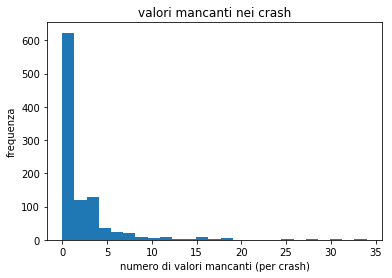

In [25]:
plt.hist(missing_values,bins=25)
plt.xlabel('numero di valori mancanti (per crash)')
plt.ylabel('frequenza')
plt.title('valori mancanti nei crash')

In [26]:
for root,_,files in os.walk('C:\\Users\leuci\Desktop\Blob2csv\POS'):
    for file in files:
        if 'before' not in file:
            continue
        print(file)

2018_02_12 20_43_20.000_34772334_248271_TRIP1_POS_beforeAugust.csv
2018_02_12 20_44_24.000_34772376_248271_TRIP1_POS_beforeAugust.csv
2018_02_13 17_36_15.000_34834902_248283_TRIP1_POS_beforeAugust.csv
2018_02_13 19_15_15.000_34843189_248202_TRIP1_POS_beforeAugust.csv
2018_02_13 21_00_30.000_34849206_248283_TRIP1_POS_beforeAugust.csv
2018_02_13 21_09_48.000_34849576_248328_TRIP1_POS_beforeAugust.csv
2018_02_13 21_11_08.000_34849637_248328_TRIP1_POS_beforeAugust.csv
2018_02_13 23_07_57.000_34853928_248271_TRIP1_POS_beforeAugust.csv
2018_02_13 23_09_31.000_34853981_248271_TRIP1_POS_beforeAugust.csv
2018_02_14 11_29_29.000_34882592_244763_TRIP1_POS_beforeAugust.csv
2018_02_15 08_47_55.000_34950598_244763_TRIP1_POS_beforeAugust.csv
2018_02_15 11_45_07.000_34963023_244763_TRIP1_POS_beforeAugust.csv
2018_02_15 13_54_02.000_34974045_248200_TRIP1_POS_beforeAugust.csv
2018_02_15 16_35_56.000_34987589_248328_TRIP1_POS_beforeAugust.csv
2018_02_15 18_28_43.000_34997904_248198_TRIP1_POS_beforeAugust

In [9]:
data

{'crashId': '56460394',
 'deviceId': '244737',
 'deviceType': 'GENERALI_PILOT_TSP',
 'tenant': 2,
 'enterprise': 770,
 'systemDate': '2018-10-13T23:47:02.15+00:00',
 'deviceDate': '2018-10-13T23:44:14',
 'lastDateFix': '2018-10-13T23:44:14',
 'precenseSubkey': 1,
 'crash_position': [{'deviceDate': '2018-10-13T23:43:54',
   'latitude': 45.4563,
   'longitude': 9.21273,
   'speed': 60.0,
   'millSec': -20000.0},
  {'deviceDate': '2018-10-13T23:43:55',
   'latitude': 45.45637,
   'longitude': 9.21255,
   'speed': 55.0,
   'millSec': -19000.0},
  {'deviceDate': '2018-10-13T23:43:56',
   'latitude': 45.45643,
   'longitude': 9.21239,
   'speed': 44.0,
   'millSec': -18000.0},
  {'deviceDate': '2018-10-13T23:43:57',
   'latitude': 45.45646,
   'longitude': 9.21228,
   'speed': 30.0,
   'millSec': -17000.0},
  {'deviceDate': '2018-10-13T23:43:58',
   'latitude': 45.45649,
   'longitude': 9.2122,
   'speed': 18.0,
   'millSec': -16000.0},
  {'deviceDate': '2018-10-13T23:43:59',
   'latitude': 